# **Anticipez les besoins en consommation de bâtiments**

In [1]:
pip install numpy pandas scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
import re
import warnings
import os

##   Importation fichier

In [3]:
# Afficher toutes les colonnes
pd.options.display.max_columns = None

In [4]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [5]:
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

## Exploration des données

### afficher les 5 dernier lignes

In [6]:
data.tail()

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
3371      NaN                    1624049080                    2   
3372      NaN                    3558300000                    2   
3373      NaN                    1794501150                    7   
3374      NaN                    7883603155                    1   
3375      NaN                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
3371       GREATER DUWAMISH  47.56722 -122.31154       1990   
3372               DOWNTOWN  47.59625 -122.32283       2004   
3373  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784       1974   
3374       GREATER DUWAMISH  47.52832 -122.32431       1989   
3375       GREATER DUWAMISH  47.53939 -122.29536       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3371                1.0               1             12294                   0   
3372                1.0               1             16000                   0   
3373                1.0               1             13157                   0   
3374                1.0               1             14101                   0   
3375                1.0               1             18258                   0   

      PropertyGFABuilding(s)  \
3371                   12294   
3372                   16000   
3373                   13157   
3374                   14101   
3375                   18258   

                              ListOfAllPropertyUseTypes  \
3371                                             Office   
3372                                 Other - Recreation   
3373  Fitness Center/Health Club/Gym, Other - Recrea...   
3374  Fitness Center/Health Club/Gym, Food Service, ...   
3375  Fitness Center/Health Club/Gym, Food Service, ...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3371                 Office                    12294.0   
3372     Other - Recreation                    16000.0   
3373     Other - Recreation                     7583.0   
3374     Other - Recreation                     6601.0   
3375     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3371                             NaN                              NaN   
3372                             NaN                              NaN   
3373  Fitness Center/Health Club/Gym                           5574.0   
3374  Fitness Center/Health Club/Gym                           6501.0   
3375  Fitness Center/Health Club/Gym                           8000.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3371                         NaN                             NaN   
3372                         NaN                             NaN   
3373               Swimming Pool                             0.0   
3374          Pre-school/Daycare                           484.0   
3375          Pre-school/Daycare                          1108.0   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3371      

### Nombre de ligne et colone

In [7]:
data.shape

(3376, 46)

### Afficher 5 ligne au hasard

In [8]:
data.sample(5)

OSEBuildingID  DataYear          BuildingType   PrimaryPropertyType  \
249             374      2016        NonResidential    Mixed Use Property   
3285          49990      2016  Multifamily LR (1-4)  Low-Rise Multifamily   
1748          23301      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   
284             414      2016        NonResidential          Large Office   
1149          21106      2016  Multifamily MR (5-9)  Mid-Rise Multifamily   

                         PropertyName            Address     City State  \
249                   ECONET (ID#374)       3005 1ST AVE  Seattle    WA   
3285                 Valor Apartments  12517 33rd Ave NE  Seattle    WA   
1748            Harborview Apartments        600 9th Ave  Seattle    WA   
284   Onni 1411 Fourth Development LP       1411 4TH AVE  Seattle    WA   
1149         Simons Senior Apartments       2121 3rd Ave  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
249   98121.0                    0695000135                    7     DOWNTOWN   
3285  98125.0                    1453601181                    5        NORTH   
1748  98104.0                    8590900160                    3         EAST   
284   98101.0                    1975700345                    7     DOWNTOWN   
1149  98121.0                    1977201155                    7     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
249   47.61770 -122.35450       1980                1.0               4   
3285  47.71986 -122.29297       2015                1.0               4   
1748  47.60583 -122.32469       1960                1.0               7   
284   47.60923 -122.33625       1929                1.0              15   
1149  47.61351 -122.34312       2007                1.0               6   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
249             109347               38700                   70647   
3285             20128                   0                   20128   
1748             45564                   0                   45564   
284             151039                   0                  151039   
1149             96980                   0                   96980   

        ListOfAllPropertyUseTypes LargestPropertyUseType  \
249   Laboratory, Office, Parking             Laboratory   
3285          Multifamily Housing    Multifamily Housing   
1748          Multifamily Housing    Multifamily Housing   
284                        Office                 Office   
1149          Multifamily Housing    Multifamily Housing   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
249                     42389.0                      Parking   
3285                    21019.0                          NaN   
1748                    45564.0                          NaN   
284                    125473.0                          NaN   
1149                    66527.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
249                           38700.0                      Office   
3285                              NaN                         NaN   
1748                              NaN                         NaN   
284                               NaN                         NaN   
1149                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
249                          28258.0                      NaN   
3285                             NaN                      NaN   
1748                             NaN                      NaN   
284                              NaN                      NaN   
1149                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
249               NaN        116.300003          118.599998   
3285             30.0         29.500000           29.50

### Les types de chaque variable

In [9]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBtu/sf)                   float64
SiteEUIWN(kBtu/sf)                 float64
SourceEUI(kBtu/sf)                 float64
SourceEUIWN(kBtu/sf)               float64
SiteEnergyUse(kBtu)                float64
SiteEnergyUseWN(kBtu)              float64
SteamUse(kBtu)                     float64
Electricity(kWh)                   float64
Electricity(kBtu)                  float64
NaturalGas(therms)                 float64
NaturalGas(kBtu)                   float64
DefaultData                           bool
Comments                           float64
ComplianceStatus                    object
Outlier                             object
TotalGHGEmissions                  float64
GHGEmissionsIntensity              float64
dtype: object

### Info des variables

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### Nombre de valeurs uniques de chaque colonne

In [11]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352
ThirdLargestPropertyUseType          44
ThirdLargestPropertyUseTypeGFA      501
YearsENERGYSTARCertified             65
ENERGYSTARScore                     100
SiteEUI(kBtu/sf)                   1085
SiteEUIWN(kBtu/sf)                 1105
SourceEUI(kBtu/sf)                 1648
SourceEUIWN(kBtu/sf)               1694
SiteEnergyUse(kBtu)                3354
SiteEnergyUseWN(kBtu)              3341
SteamUse(kBtu)                      131
Electricity(kWh)                   3352
Electricity(kBtu)                  3351
NaturalGas(therms)                 2109
NaturalGas(kBtu)                   2109
DefaultData                           2
Comments                              0
ComplianceStatus                      4
Outlier                               2
TotalGHGEmissions                  2818
GHGEmissionsIntensity               511
dtype: int64

### Les duplicata

In [12]:
data.duplicated().sum()

0

### Les données manquantes

In [13]:
data.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
YearsENERGYSTARCertified           3257
ENERGYSTARScore                     843
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SourceEUI(kBtu/sf)                    9
SourceEUIWN(kBtu/sf)                  9
SiteEnergyUse(kBtu)                   5
SiteEnergyUseWN(kBtu)                 6
SteamUse(kBtu)                        9
Electricity(kWh)                      9
Electricity(kBtu)                     9
NaturalGas(therms)                    9
NaturalGas(kBtu)                      9
DefaultData                           0
Comments                           3376
ComplianceStatus                      0
Outlier                            3344
TotalGHGEmissions                     9
GHGEmissionsIntensity                 9
dtype: int64

### pourcentage des données manquantes

In [14]:
# Calculer le taux de remplissage des colonnes
missing_values = data.isnull().mean() * 100
print(missing_values)

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.266588
LargestPropertyUseType            

### proportion des données manquantes

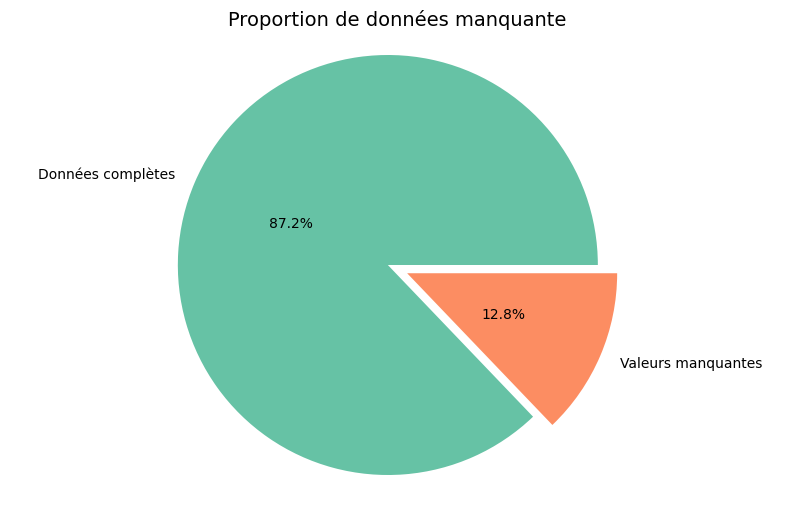

In [15]:
# proportion de donnee manquante
total_manquant = np.prod(data.shape)
valeur_manquant = data.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  # Explosion de la tranche de "Valeurs manquantes"
couleurs = ['#66c2a5', '#fc8d62']  # Couleurs des tranches

# Création du graphique en secteurs
plt.figure(figsize=[10, 6])  # Définition de la taille du graphique
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  # Création du graphique en secteurs
plt.title("Proportion de données manquante", fontsize=14)  # Ajout du titre
plt.axis("equal")  # Assure que le graphique est un cercle
plt.show()  # Affichage du graphique

### Missingno bar des données brute

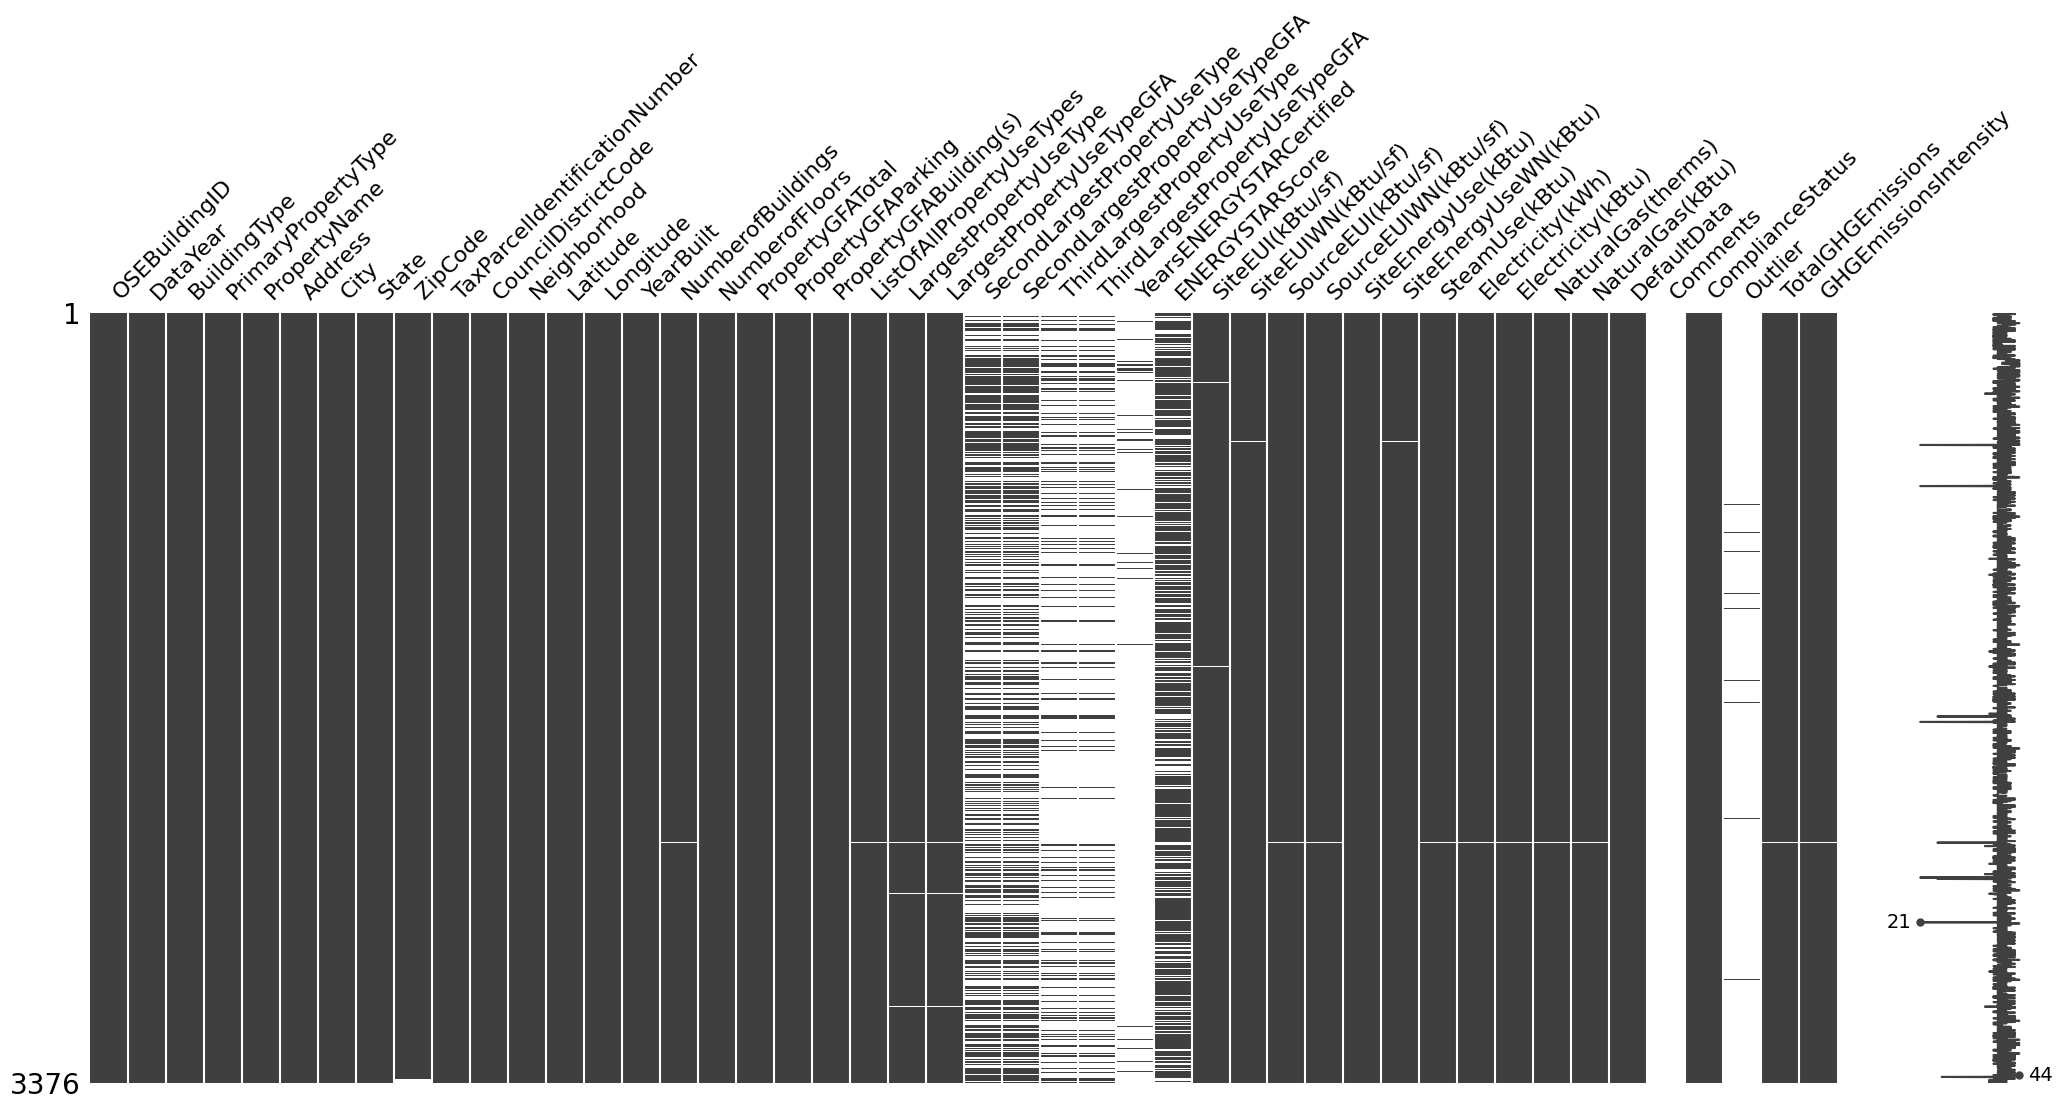

In [16]:
msn.matrix(data)
plt.show()

## Filtrer en fonction des variables lié au projet

In [17]:
# Les variables choisi
variables = [
    "BuildingType",
    "PrimaryPropertyType",
    'CouncilDistrictCode',
    "Address",
    "ZipCode",
    "Neighborhood",
    "Latitude",
    "Longitude",
    "YearBuilt",
    "NumberofBuildings",
    "PropertyGFATotal",
    "PropertyGFAParking",
    "NumberofFloors",
    "PropertyGFABuilding(s)",
    "LargestPropertyUseType",
    "LargestPropertyUseTypeGFA",
    "ENERGYSTARScore",
    "SiteEUI(kBtu/sf)",
    "DefaultData",
    "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SourceEUIWN(kBtu/sf)",
    "SiteEnergyUse(kBtu)",
    "SiteEnergyUseWN(kBtu)",
    "SteamUse(kBtu)",
    "Electricity(kWh)",
    "Electricity(kBtu)",
    "NaturalGas(therms)",
    "ComplianceStatus",
    "TotalGHGEmissions",
    "GHGEmissionsIntensity",
    	"Outlier",
]

# Filtrer le DataFrame pour ne conserver que les variables pertinentes
data_pertinent = data[variables]

# Afficher les premières lignes du DataFrame filtré pour vérifier
display(data_pertinent.head())

BuildingType PrimaryPropertyType  CouncilDistrictCode          Address  \
0  NonResidential               Hotel                    7    405 Olive way   
1  NonResidential               Hotel                    7  724 Pine street   
2  NonResidential               Hotel                    7  1900 5th Avenue   
3  NonResidential               Hotel                    7   620 STEWART ST   
4  NonResidential               Hotel                    7    401 LENORA ST   

   ZipCode Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0  98101.0     DOWNTOWN  47.61220 -122.33799       1927                1.0   
1  98101.0     DOWNTOWN  47.61317 -122.33393       1996                1.0   
2  98101.0     DOWNTOWN  47.61393 -122.33810       1969                1.0   
3  98101.0     DOWNTOWN  47.61412 -122.33664       1926                1.0   
4  98121.0     DOWNTOWN  47.61375 -122.34047       1980                1.0   

   PropertyGFATotal  PropertyGFAParking  NumberofFloors  \
0             88434                   0              12   
1            103566               15064              11   
2            956110              196718              41   
3             61320                   0              10   
4            175580               62000              18   

   PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                   88434                  Hotel                    88434.0   
1                   88502                  Hotel                    83880.0   
2                  759392                  Hotel                   756493.0   
3                   61320                  Hotel                    61320.0   
4                  113580                  Hotel                   123445.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  DefaultData  SiteEUIWN(kBtu/sf)  \
0             60.0         81.699997        False           84.300003   
1             61.0         94.800003        False           97.900002   
2             43.0         96.000000        False           97.699997   
3             56.0        110.800003        False          113.300003   
4             75.0        114.800003        False          118.699997   

   SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
0          182.500000            189.000000            7226362.5   
1          176.100006            179.399994            8387933.0   
2          241.899994            244.100006           72587024.0   
3          216.199997            224.000000            6794584.0   
4          211.399994            215.600006           14172606.0   

   SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  \
0              7456910.0      2003882.00      1.156514e+06          3946027.0   
1              8664479.0            0.00      9.504252e+05          3242851.0   
2             73937112.0     21566554.00      1.451544e+07         49526664.0   
3              6946800.5      2214446.25      8.115253e+05          2768924.0   
4             14656503.0            0.00      1.573449e+06          5368607.0   

   NaturalGas(therms) ComplianceStatus  TotalGHGEmissions  \
0         12764.52930        Compliant             249.98   
1         51450.81641        Compliant             295.86   
2         14938.00000        Compliant            2089.28   
3         18112.13086        Compliant             286.43   
4         88039.98438        Compliant             505.01   

   GHGEmissionsIntensity Outlier  
0                   2.83     NaN  
1                   2.86     NaN  
2                   2.19     NaN  
3                   4.67     NaN  
4                   2.88     NaN

*Apres filtration nous allons voir l'etat des valeur manquantes*



In [18]:
# Calculer le taux de remplissage des colonnes
missing_values = data_pertinent.isnull().mean() * 100
print(missing_values)

BuildingType                  0.000000
PrimaryPropertyType           0.000000
CouncilDistrictCode           0.000000
Address                       0.000000
ZipCode                       0.473934
Neighborhood                  0.000000
Latitude                      0.000000
Longitude                     0.000000
YearBuilt                     0.000000
NumberofBuildings             0.236967
PropertyGFATotal              0.000000
PropertyGFAParking            0.000000
NumberofFloors                0.000000
PropertyGFABuilding(s)        0.000000
LargestPropertyUseType        0.592417
LargestPropertyUseTypeGFA     0.592417
ENERGYSTARScore              24.970379
SiteEUI(kBtu/sf)              0.207346
DefaultData                   0.000000
SiteEUIWN(kBtu/sf)            0.177725
SourceEUI(kBtu/sf)            0.266588
SourceEUIWN(kBtu/sf)          0.266588
SiteEnergyUse(kBtu)           0.148104
SiteEnergyUseWN(kBtu)         0.177725
SteamUse(kBtu)                0.266588
Electricity(kWh)         

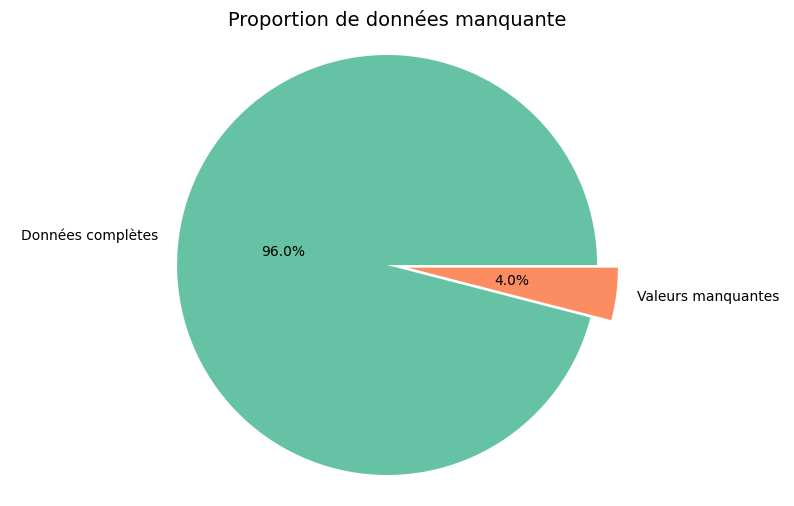

In [19]:
# proportion de donnee manquante
total_manquant = np.prod(data_pertinent.shape)
valeur_manquant = data_pertinent.isna().sum().sum()
labels = ["Données complètes", "Valeurs manquantes"]
vals = [total_manquant - valeur_manquant, valeur_manquant]
explose = (0, 0.1)  # Explosion de la tranche de "Valeurs manquantes"
couleurs = ['#66c2a5', '#fc8d62']  # Couleurs des tranches

# Création du graphique en secteurs
plt.figure(figsize=[10, 6])  # Définition de la taille du graphique
plt.pie(x=vals, labels=labels, explode=explose, autopct="%.1f%%", pctdistance=0.5, colors=couleurs)  # Création du graphique en secteurs
plt.title("Proportion de données manquante", fontsize=14)  # Ajout du titre
plt.axis("equal")  # Assure que le graphique est un cercle
plt.show()  # Affichage du graphique

*On constate une baisse de valeur manquante de 12.8% à 4*

## Distribution des variables numerique et categoritielle

*Nous allons faire une distribution de chaque variable afin de voir une idée sur les abberantes ou non*

### Distribution des variables numeriques

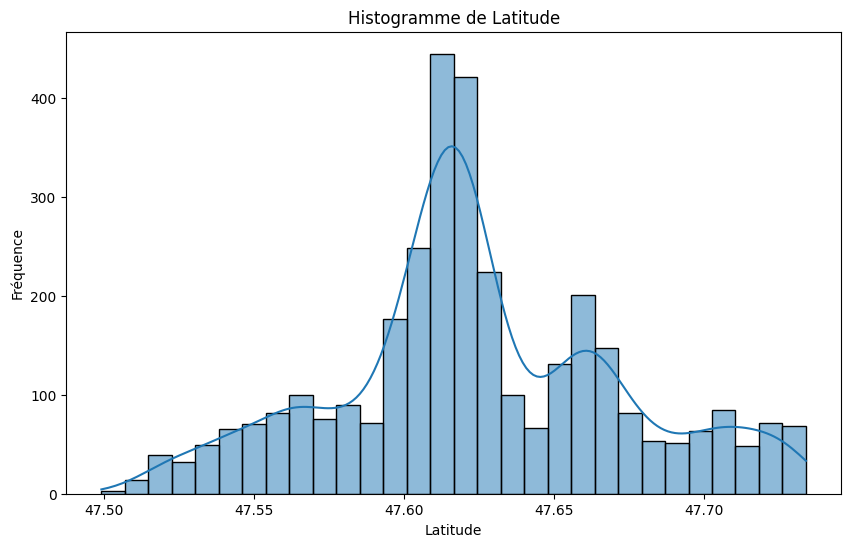

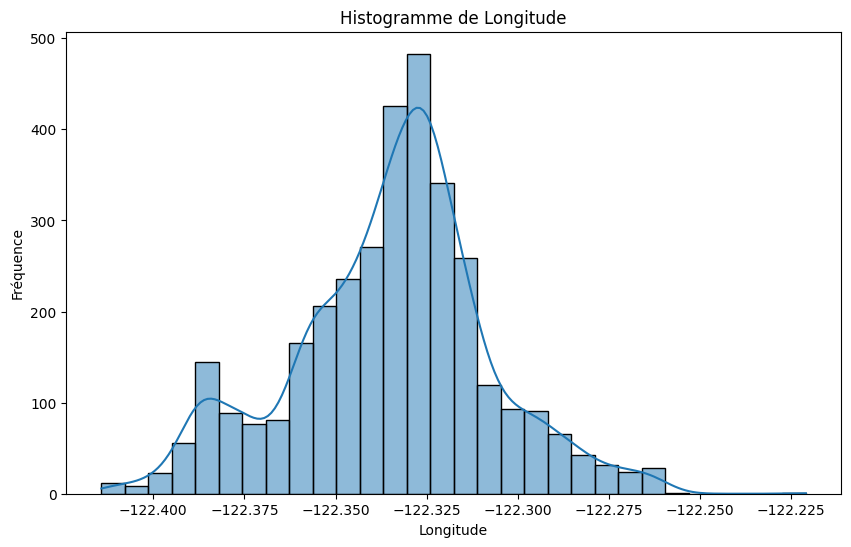

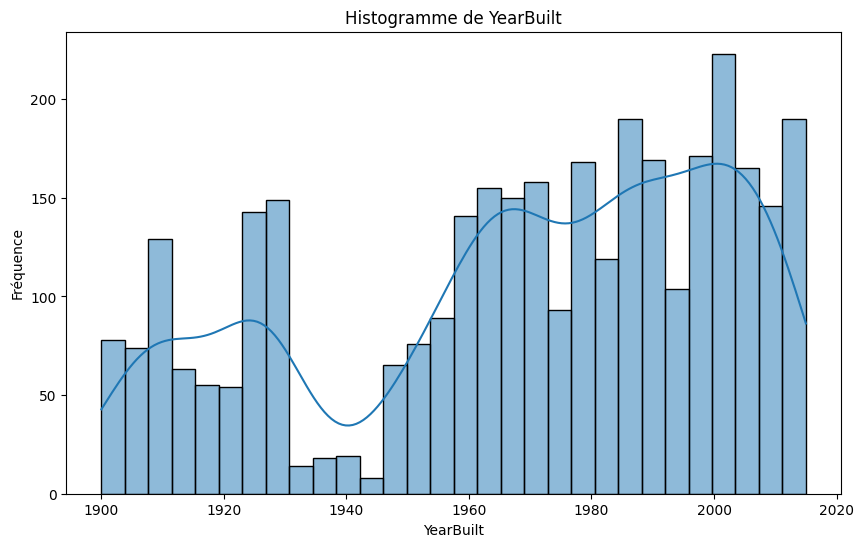

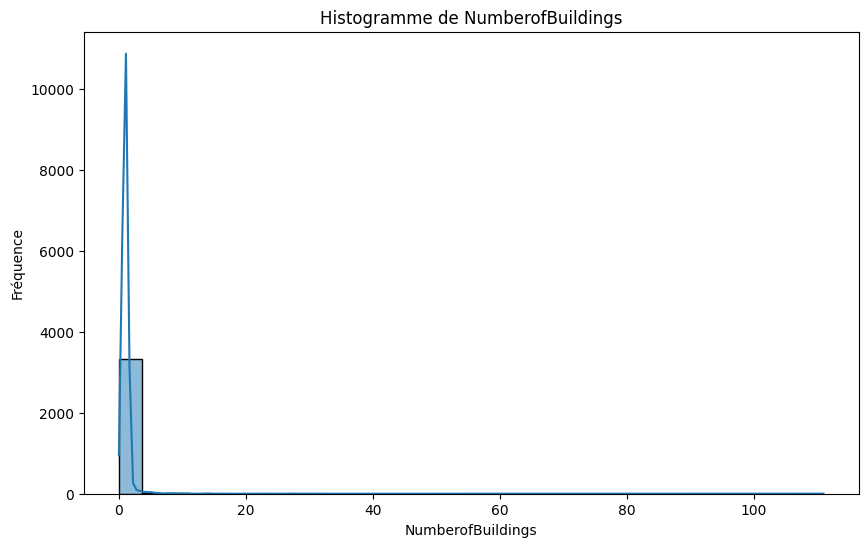

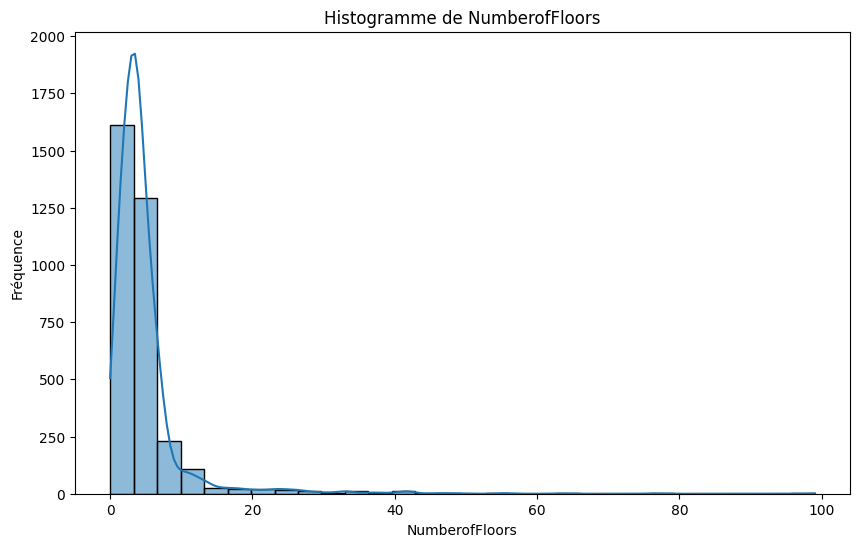

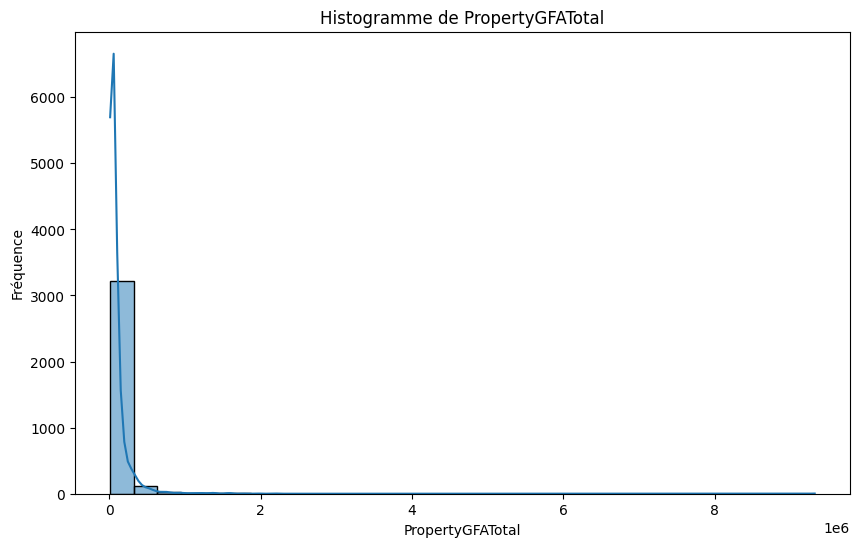

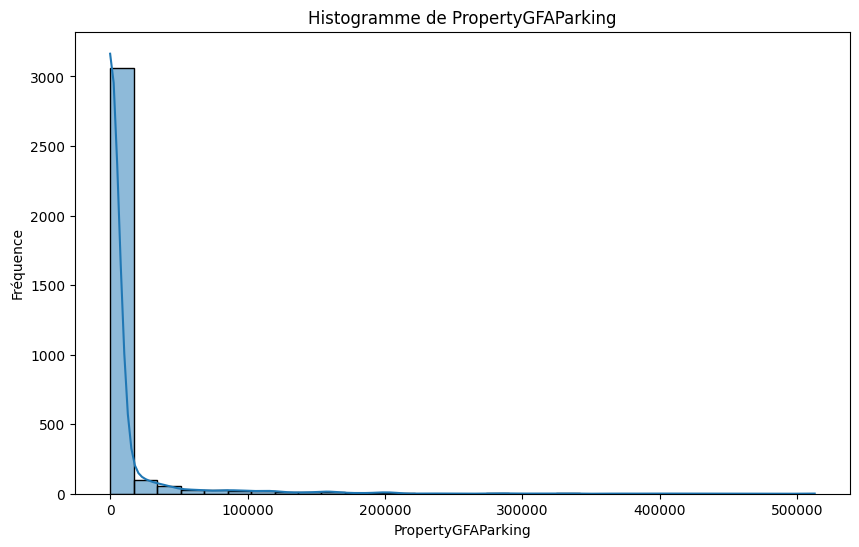

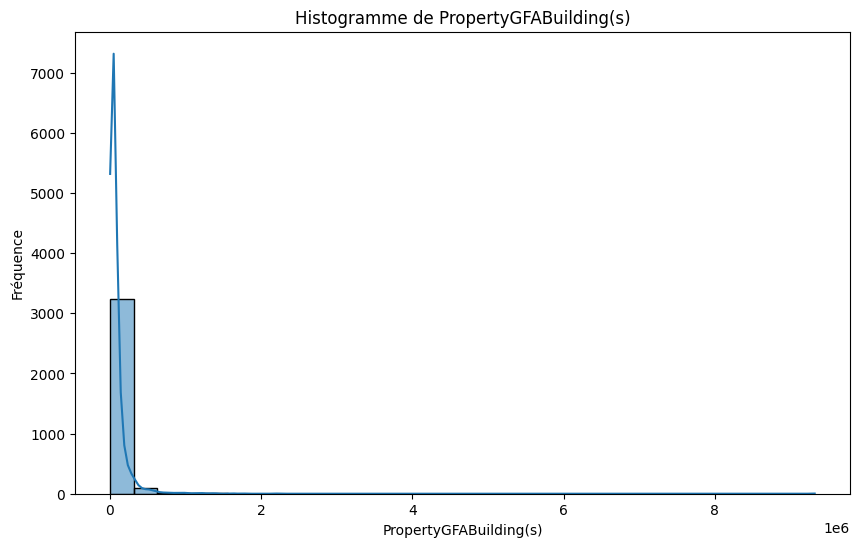

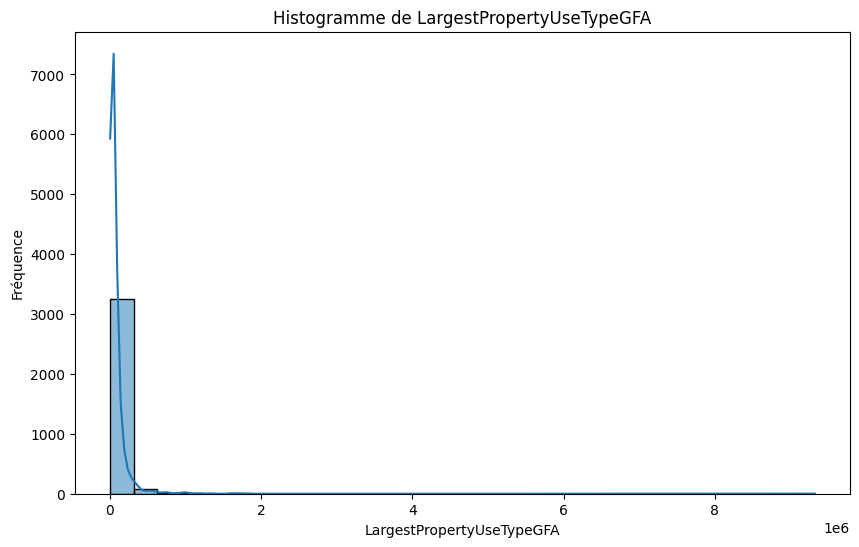

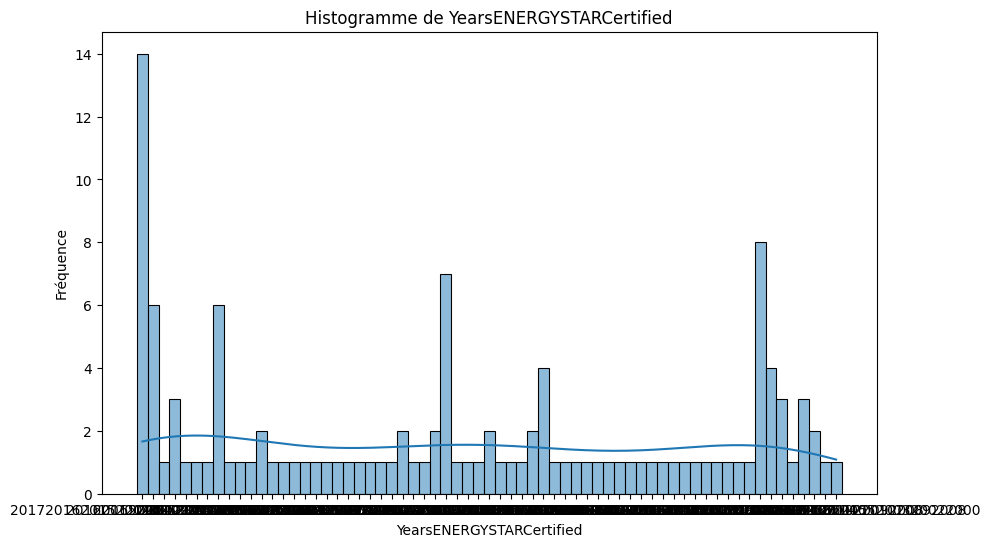

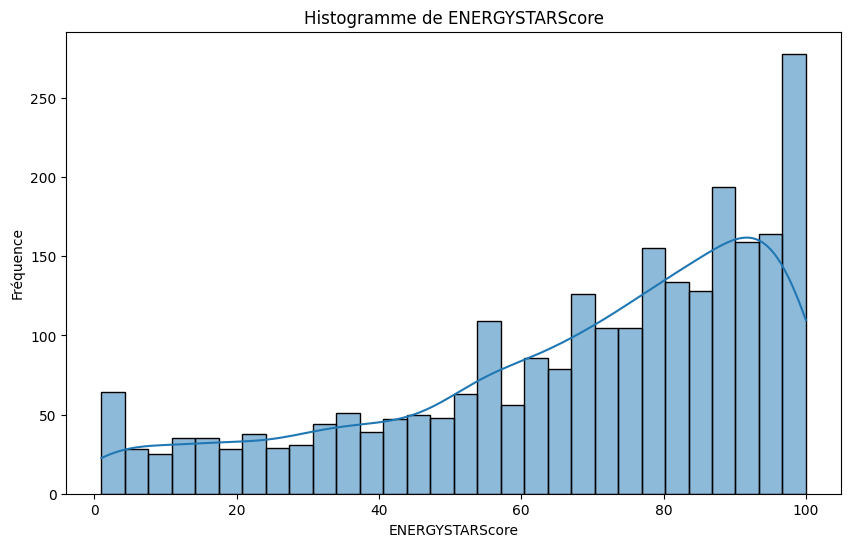

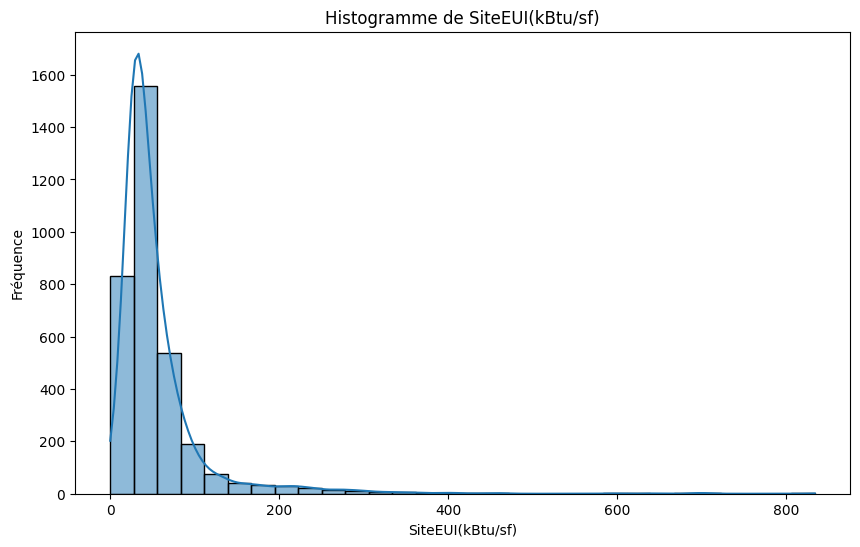

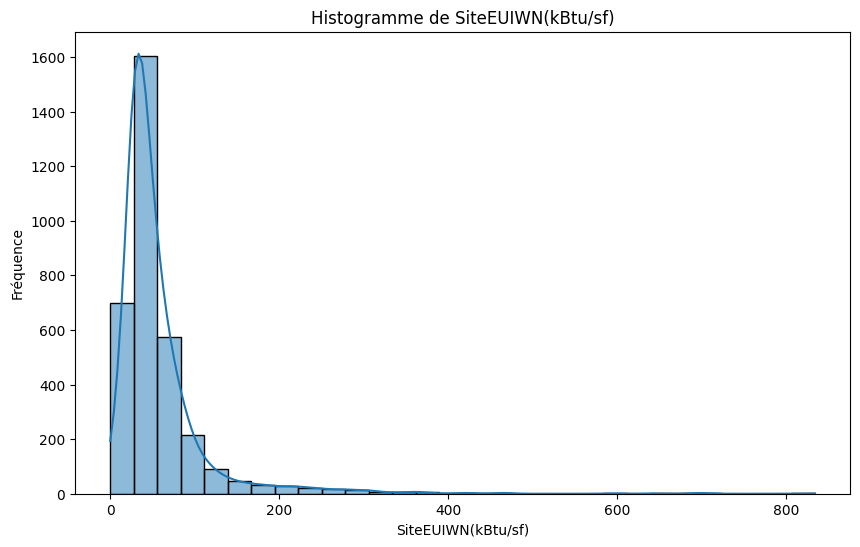

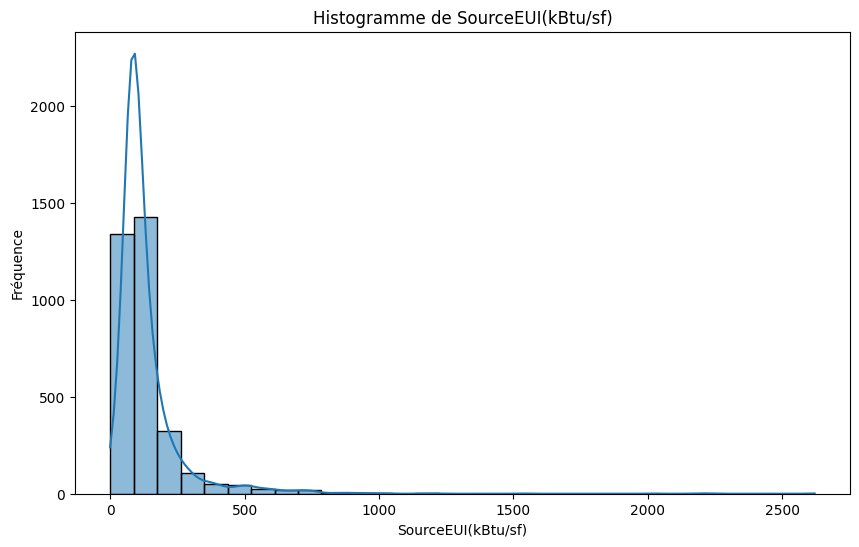

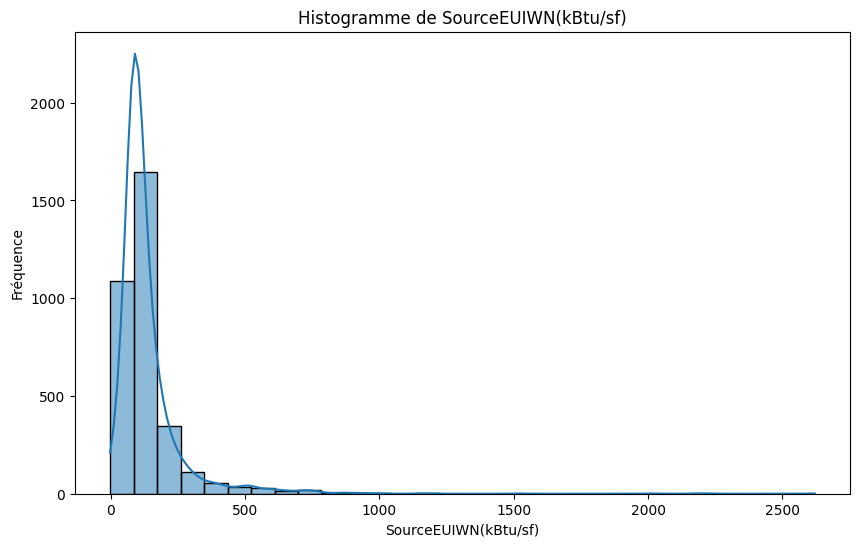

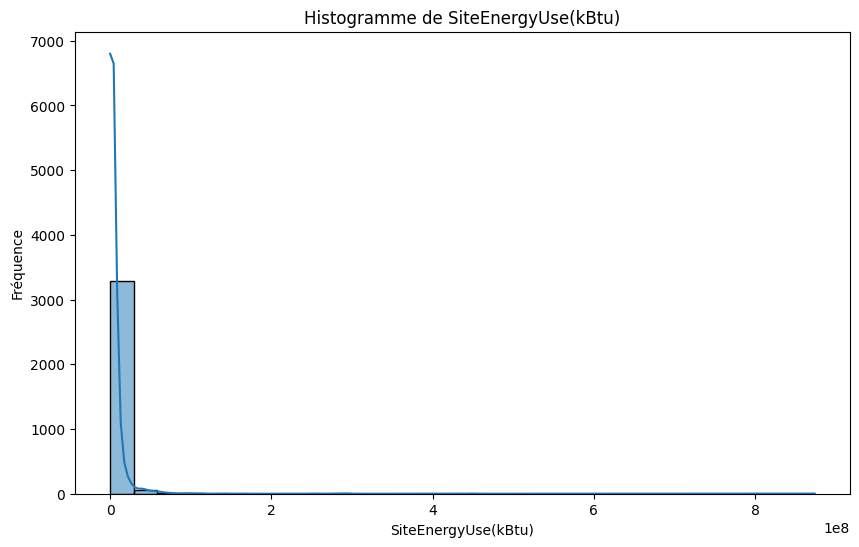

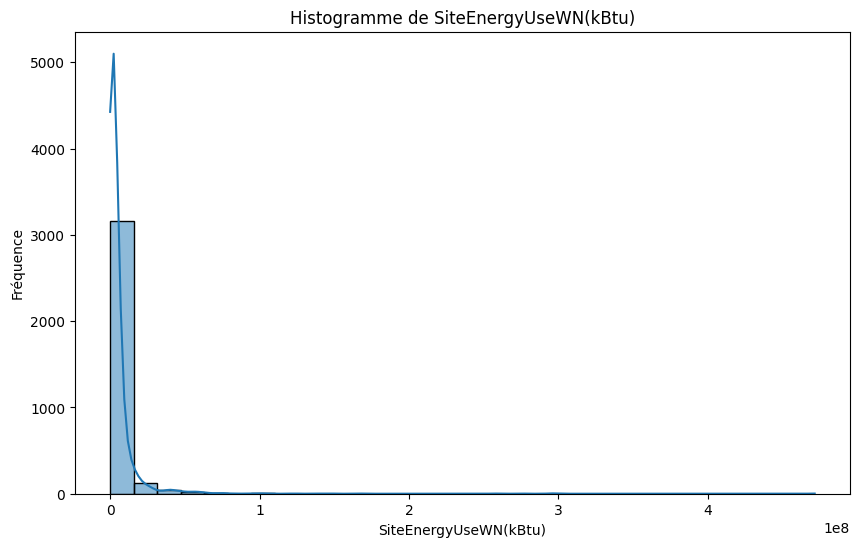

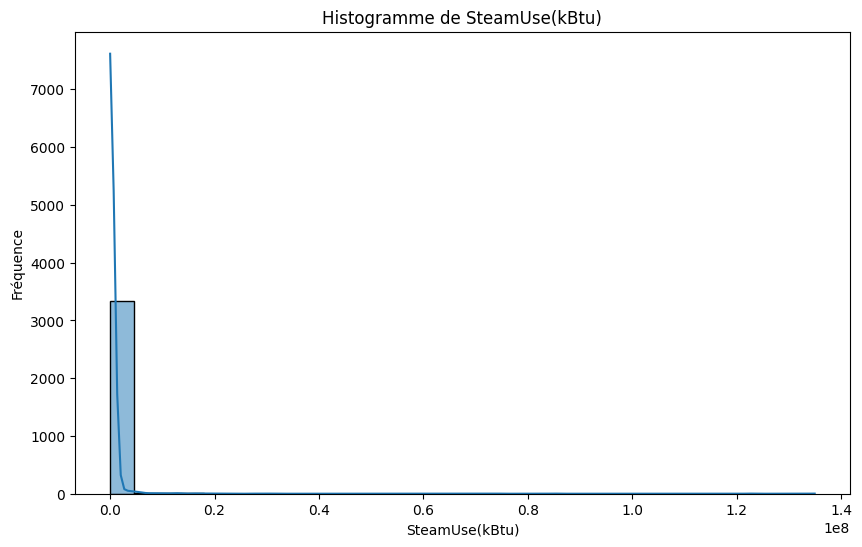

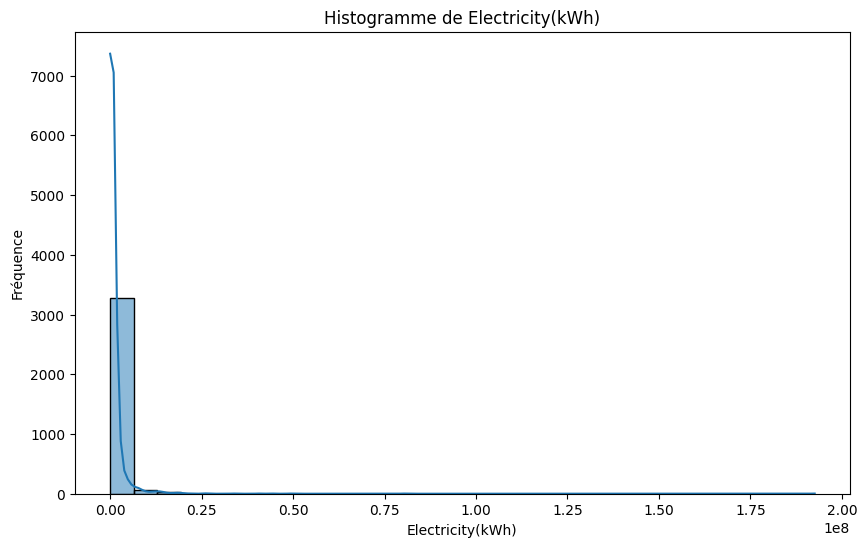

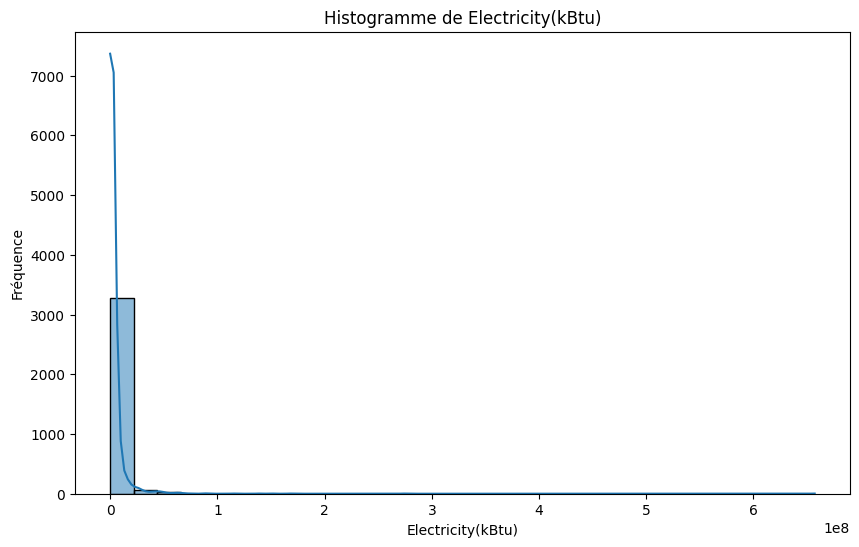

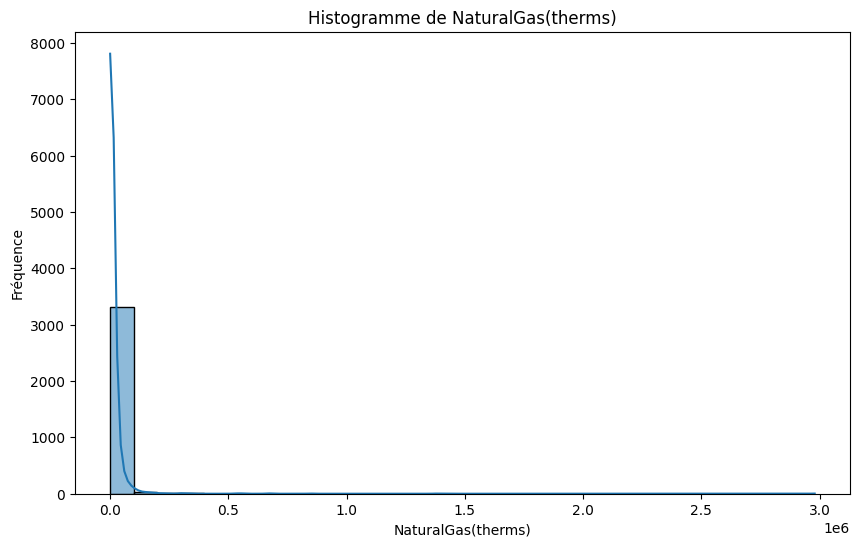

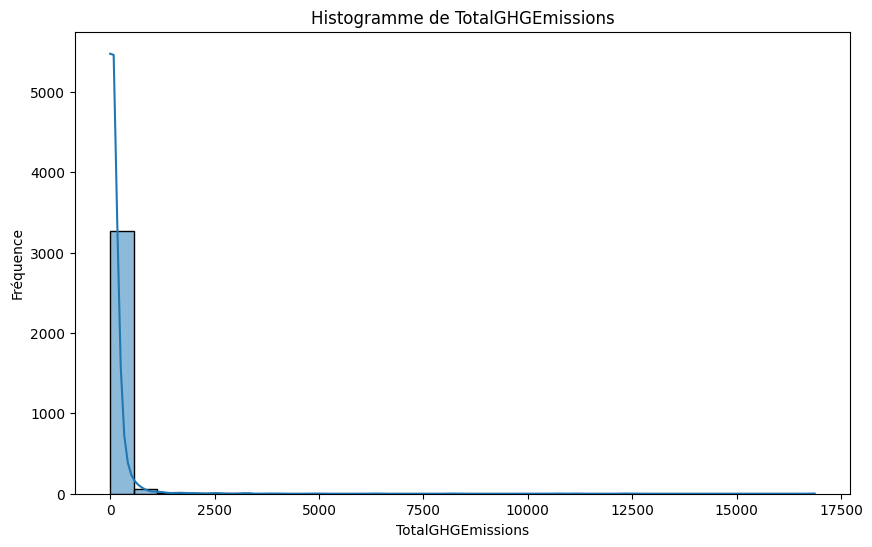

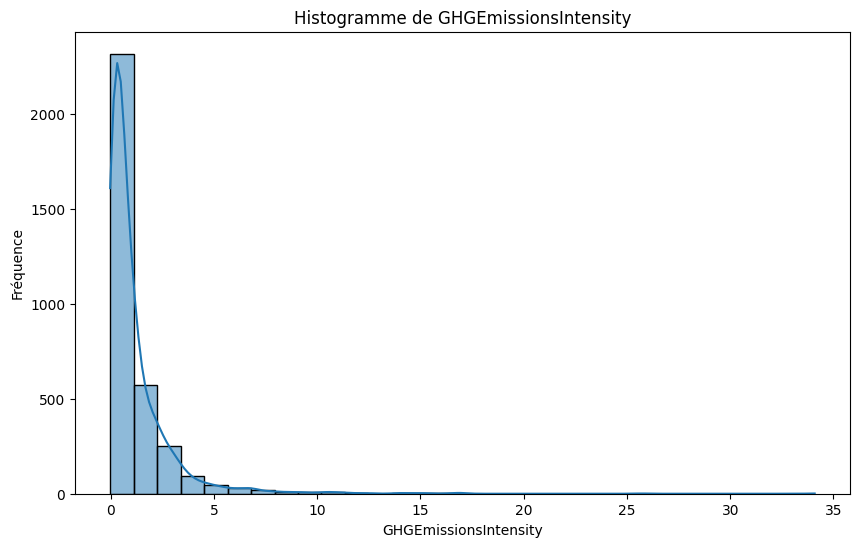

In [20]:
# Liste des variables numériques à visualiser
numerical_variables = [
    "Latitude", "Longitude", "YearBuilt", "NumberofBuildings",
    "NumberofFloors", "PropertyGFATotal", "PropertyGFAParking",
    "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA",
    "YearsENERGYSTARCertified", "ENERGYSTARScore", "SiteEUI(kBtu/sf)",
    "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)",
    "SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)",
    "Electricity(kWh)", "Electricity(kBtu)", "NaturalGas(therms)",
    "TotalGHGEmissions", "GHGEmissionsIntensity"
]

# Boucle pour créer un histogramme pour chaque variable
for var in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Histogramme de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()

### Distibution des variables categoritielles

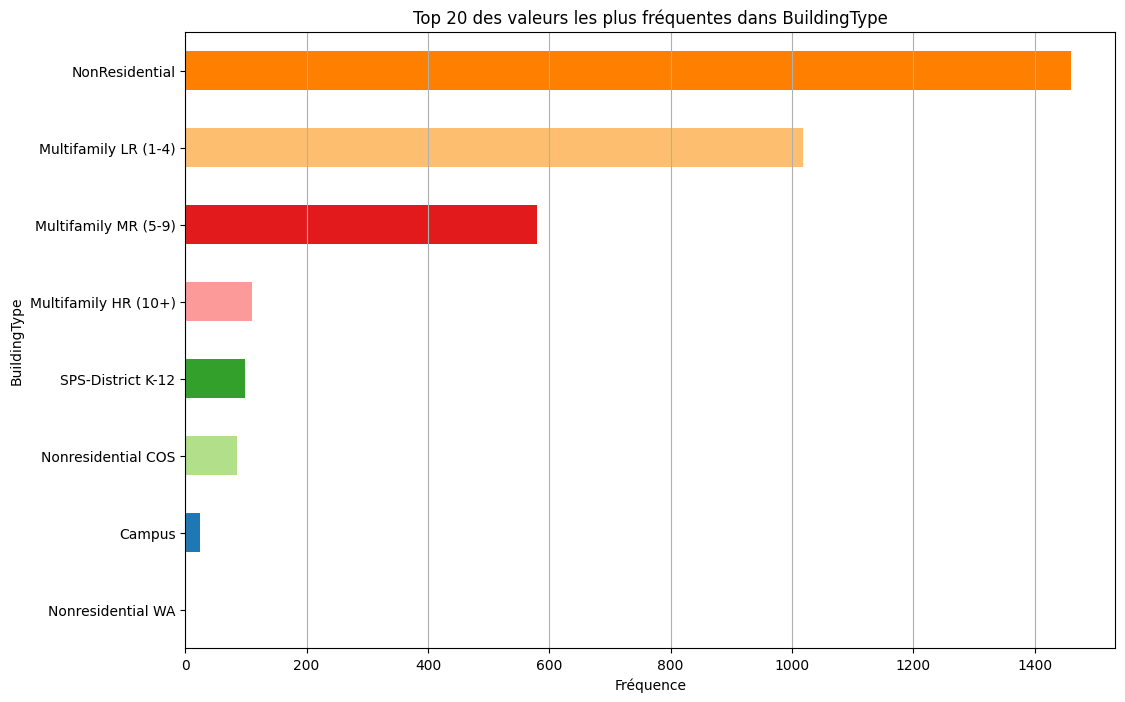

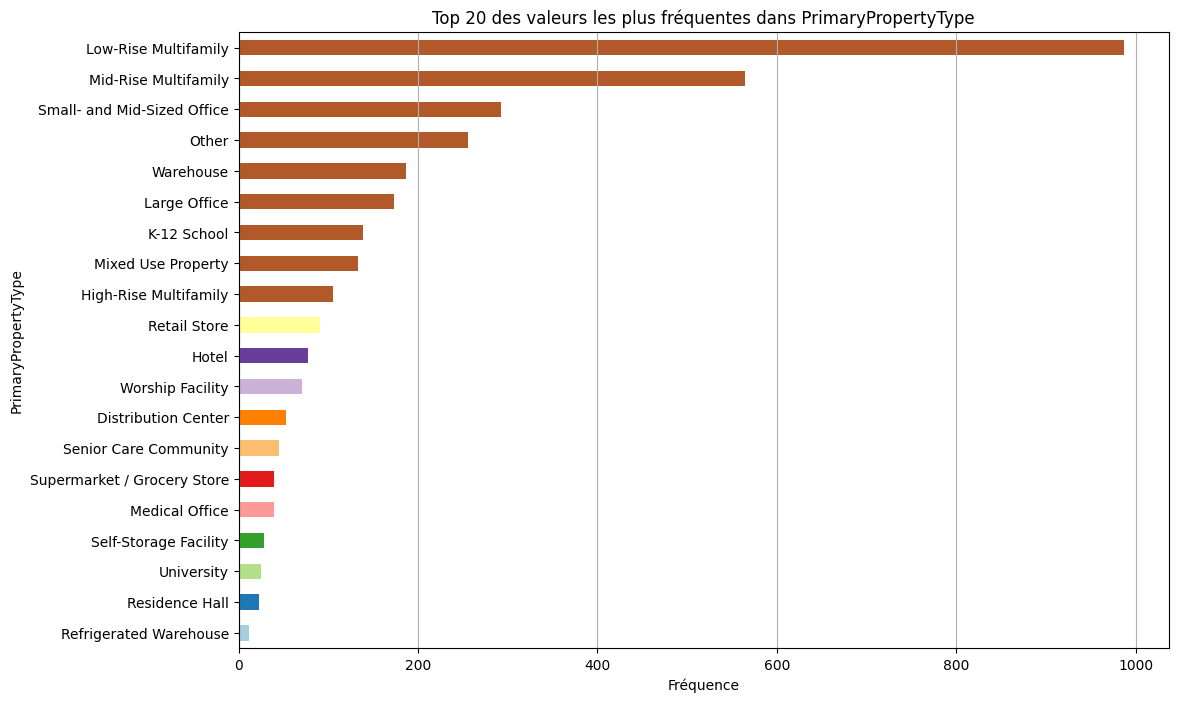

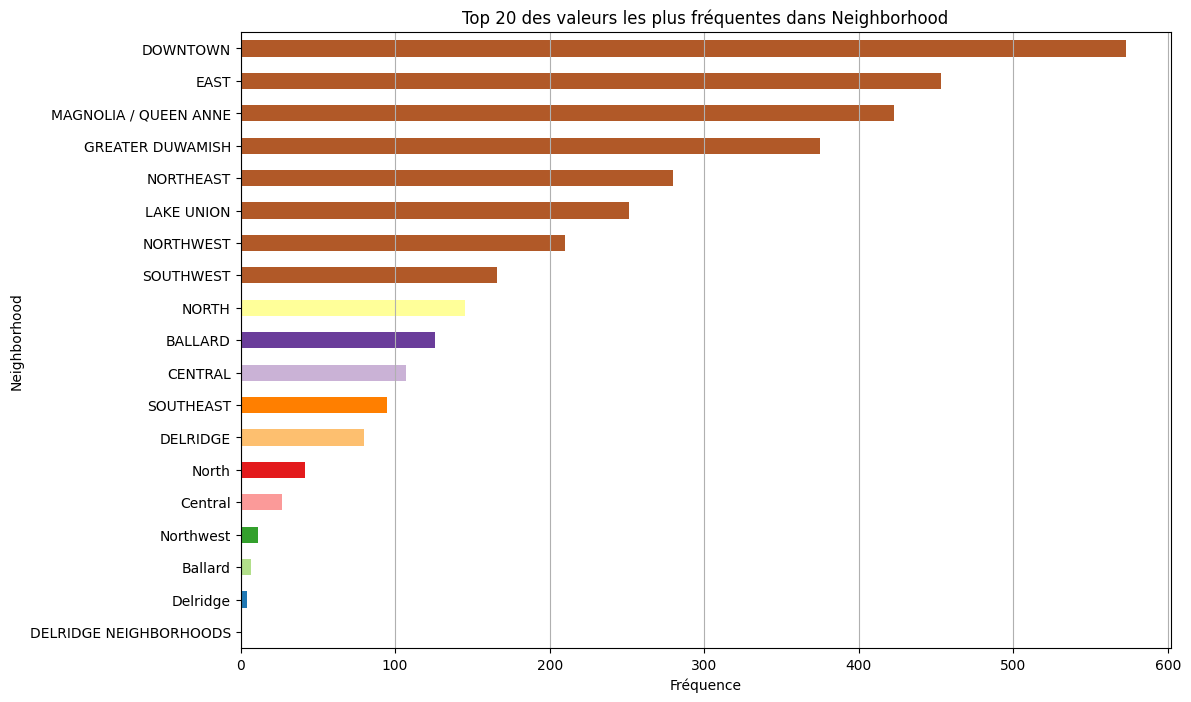

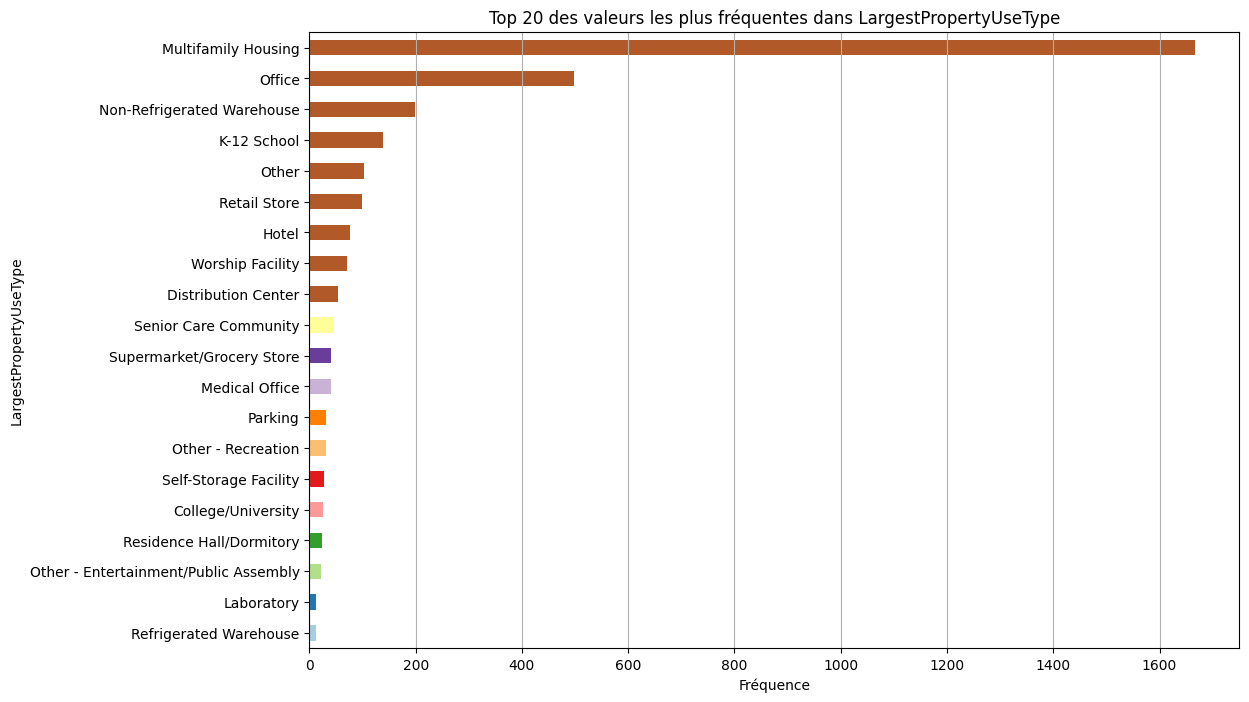

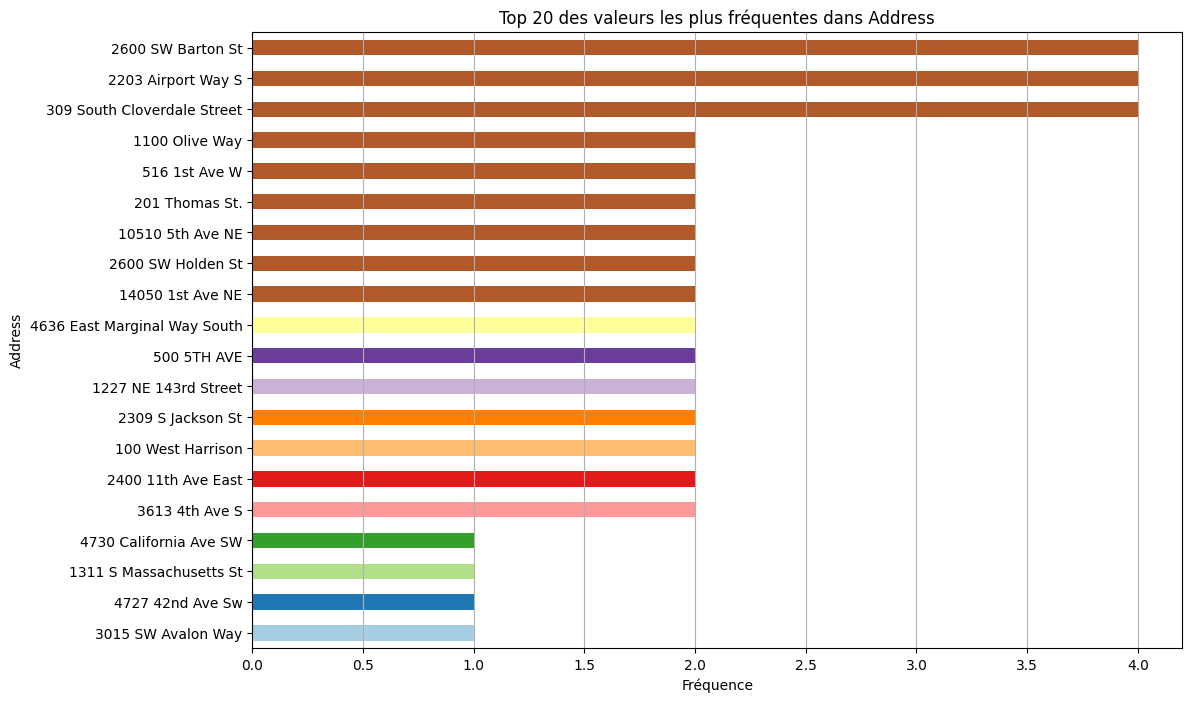

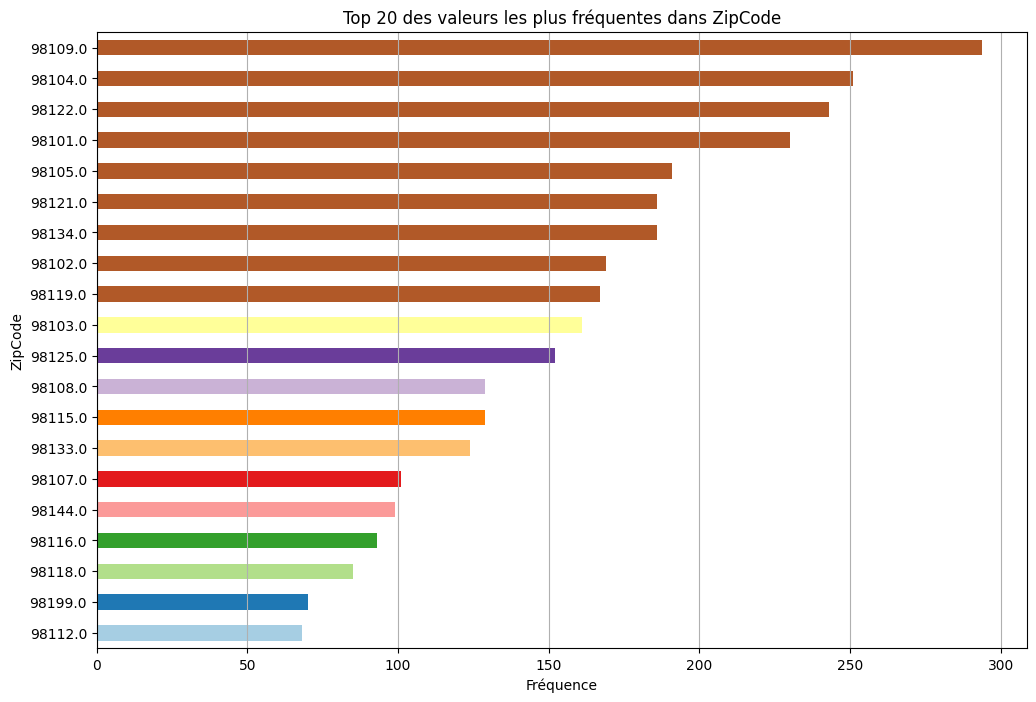

In [21]:
# Liste des variables catégorielles à visualiser
categorical_variables = [
    "BuildingType", "PrimaryPropertyType", "Neighborhood", "LargestPropertyUseType", "Address", "ZipCode"
]

# Boucle pour créer un graphique en barres horizontales pour chaque variable catégorielle
for var in categorical_variables:
    # Compter les occurrences des valeurs dans la colonne catégorielle
    word_counts = data_pertinent[var].value_counts().head(20)

    # Trier les résultats de façon décroissante
    word_counts = word_counts.sort_values(ascending=True)

    # Générer une liste de couleurs pour le graphique
    colors = plt.cm.Paired(range(len(word_counts)))

    # Générer le graphique en barres horizontales
    plt.figure(figsize=(12, 8))
    word_counts.plot(kind='barh', color=colors)
    plt.title(f'Top 20 des valeurs les plus fréquentes dans {var}')
    plt.xlabel('Fréquence')
    plt.ylabel(var)
    plt.grid(axis='x')

    # Afficher le graphique
    plt.show()

In [22]:
data_pertinent

BuildingType PrimaryPropertyType  CouncilDistrictCode  \
0         NonResidential               Hotel                    7   
1         NonResidential               Hotel                    7   
2         NonResidential               Hotel                    7   
3         NonResidential               Hotel                    7   
4         NonResidential               Hotel                    7   
...                  ...                 ...                  ...   
3371  Nonresidential COS              Office                    2   
3372  Nonresidential COS               Other                    2   
3373  Nonresidential COS               Other                    7   
3374  Nonresidential COS  Mixed Use Property                    1   
3375  Nonresidential COS  Mixed Use Property                    2   

               Address  ZipCode           Neighborhood  Latitude  Longitude  \
0        405 Olive way  98101.0               DOWNTOWN  47.61220 -122.33799   
1      724 Pine street  98101.0               DOWNTOWN  47.61317 -122.33393   
2      1900 5th Avenue  98101.0               DOWNTOWN  47.61393 -122.33810   
3       620 STEWART ST  98101.0               DOWNTOWN  47.61412 -122.33664   
4        401 LENORA ST  98121.0               DOWNTOWN  47.61375 -122.34047   
...                ...      ...                    ...       ...        ...   
3371  1600 S Dakota St      NaN       GREATER DUWAMISH  47.56722 -122.31154   
3372     719 8th Ave S      NaN               DOWNTOWN  47.59625 -122.32283   
3373    1920 1st Ave W      NaN  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374    8319 8th Ave S      NaN       GREATER DUWAMISH  47.52832 -122.32431   
3375  2820 S Myrtle St      NaN       GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  PropertyGFATotal  PropertyGFAParking  \
0          1927                1.0             88434                   0   
1          1996                1.0            103566               15064   
2          1969                1.0            956110              196718   
3          1926                1.0             61320                   0   
4          1980                1.0            175580               62000   
...         ...                ...               ...                 ...   
3371       1990                1.0             12294                   0   
3372       2004                1.0             16000                   0   
3373       1974                1.0             13157                   0   
3374       1989                1.0             14101                   0   
3375       1938                1.0             18258                   0   

      NumberofFloors  PropertyGFABuilding(s) LargestPropertyUseType  \
0                 12                   88434                  Hotel   
1                 11                   88502                  Hotel   
2                 41                  759392                  Hotel   
3                 10                   61320                  Hotel   
4                 18                  113580                  Hotel   
...              ...                     ...                    ...   
3371               1                   12294                 Office   
3372               1                   16000     Other - Recreation   
3373               1                   13157     Other - Recreation   
3374               1                   14101     Other - Recreation   
3375               1                   18258     Other - Recreation   

      LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                       88434.0             60.0         81.699997   
1                       83880.0             61.0         94.800003   
2                      756493.0             43.0         96.000000   
3                       61320.0             56.0        110.800003   
4                      123445.0             75.0        114.800003   
...                         ...              ...

### suprimer les ligne ou la cible SiteEUI(kBtu/sf) est NaN

In [23]:
data_pertinent = data_pertinent.dropna(subset=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)'])
data_pertinent

BuildingType PrimaryPropertyType  CouncilDistrictCode  \
0         NonResidential               Hotel                    7   
1         NonResidential               Hotel                    7   
2         NonResidential               Hotel                    7   
3         NonResidential               Hotel                    7   
4         NonResidential               Hotel                    7   
...                  ...                 ...                  ...   
3371  Nonresidential COS              Office                    2   
3372  Nonresidential COS               Other                    2   
3373  Nonresidential COS               Other                    7   
3374  Nonresidential COS  Mixed Use Property                    1   
3375  Nonresidential COS  Mixed Use Property                    2   

               Address  ZipCode           Neighborhood  Latitude  Longitude  \
0        405 Olive way  98101.0               DOWNTOWN  47.61220 -122.33799   
1      724 Pine street  98101.0               DOWNTOWN  47.61317 -122.33393   
2      1900 5th Avenue  98101.0               DOWNTOWN  47.61393 -122.33810   
3       620 STEWART ST  98101.0               DOWNTOWN  47.61412 -122.33664   
4        401 LENORA ST  98121.0               DOWNTOWN  47.61375 -122.34047   
...                ...      ...                    ...       ...        ...   
3371  1600 S Dakota St      NaN       GREATER DUWAMISH  47.56722 -122.31154   
3372     719 8th Ave S      NaN               DOWNTOWN  47.59625 -122.32283   
3373    1920 1st Ave W      NaN  MAGNOLIA / QUEEN ANNE  47.63644 -122.35784   
3374    8319 8th Ave S      NaN       GREATER DUWAMISH  47.52832 -122.32431   
3375  2820 S Myrtle St      NaN       GREATER DUWAMISH  47.53939 -122.29536   

      YearBuilt  NumberofBuildings  PropertyGFATotal  PropertyGFAParking  \
0          1927                1.0             88434                   0   
1          1996                1.0            103566               15064   
2          1969                1.0            956110              196718   
3          1926                1.0             61320                   0   
4          1980                1.0            175580               62000   
...         ...                ...               ...                 ...   
3371       1990                1.0             12294                   0   
3372       2004                1.0             16000                   0   
3373       1974                1.0             13157                   0   
3374       1989                1.0             14101                   0   
3375       1938                1.0             18258                   0   

      NumberofFloors  PropertyGFABuilding(s) LargestPropertyUseType  \
0                 12                   88434                  Hotel   
1                 11                   88502                  Hotel   
2                 41                  759392                  Hotel   
3                 10                   61320                  Hotel   
4                 18                  113580                  Hotel   
...              ...                     ...                    ...   
3371               1                   12294                 Office   
3372               1                   16000     Other - Recreation   
3373               1                   13157     Other - Recreation   
3374               1                   14101     Other - Recreation   
3375               1                   18258     Other - Recreation   

      LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                       88434.0             60.0         81.699997   
1                       83880.0             61.0         94.800003   
2                      756493.0             43.0         96.000000   
3                       61320.0             56.0        110.800003   
4                      123445.0             75.0        114.800003   
...                         ...              ...

### Traitement des valeurs hors-normes

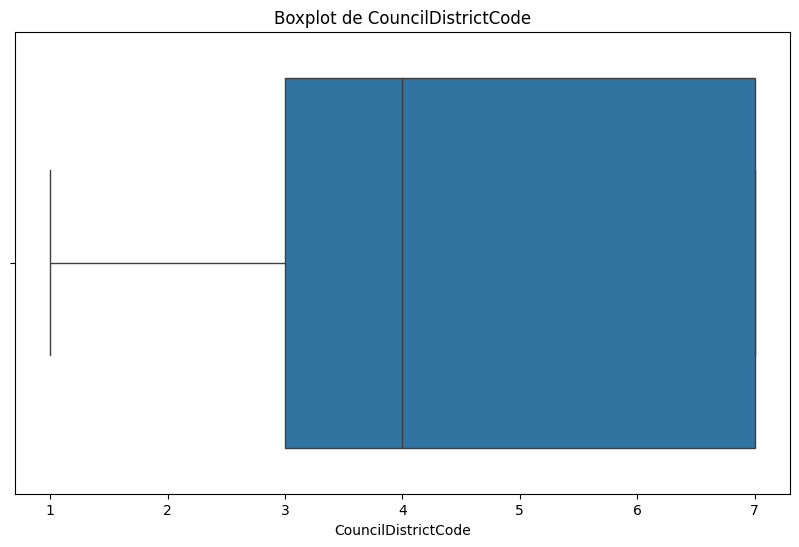

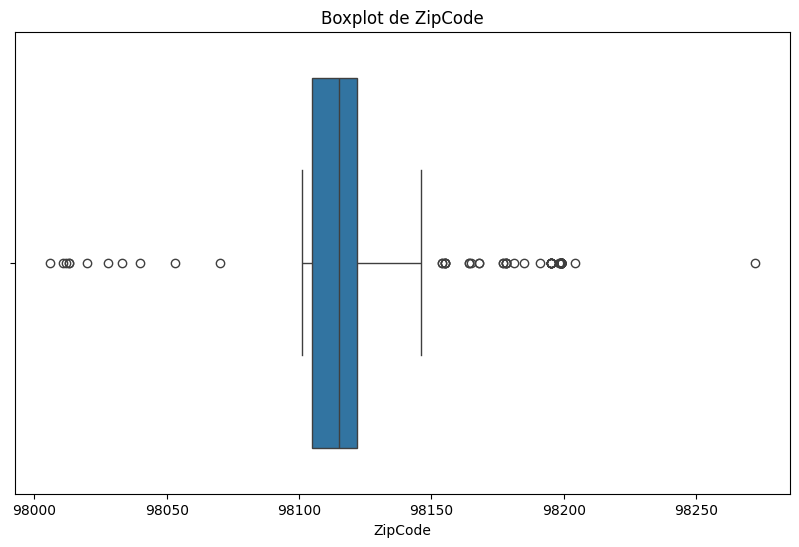

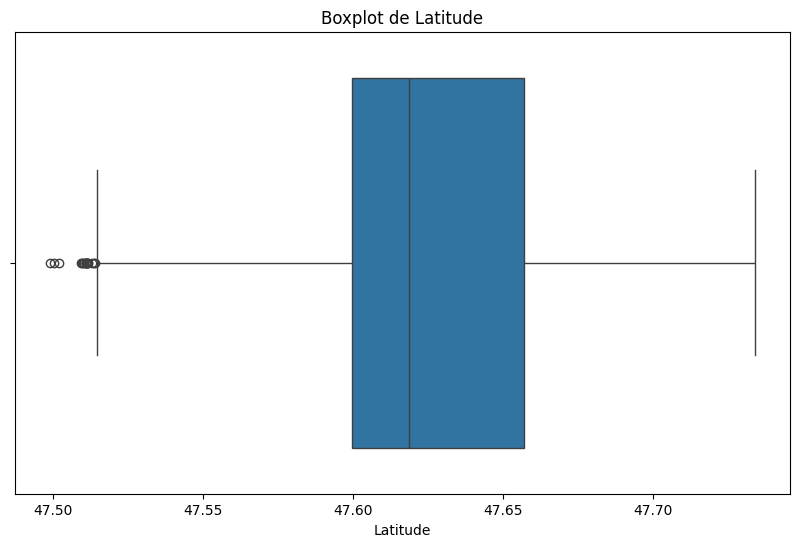

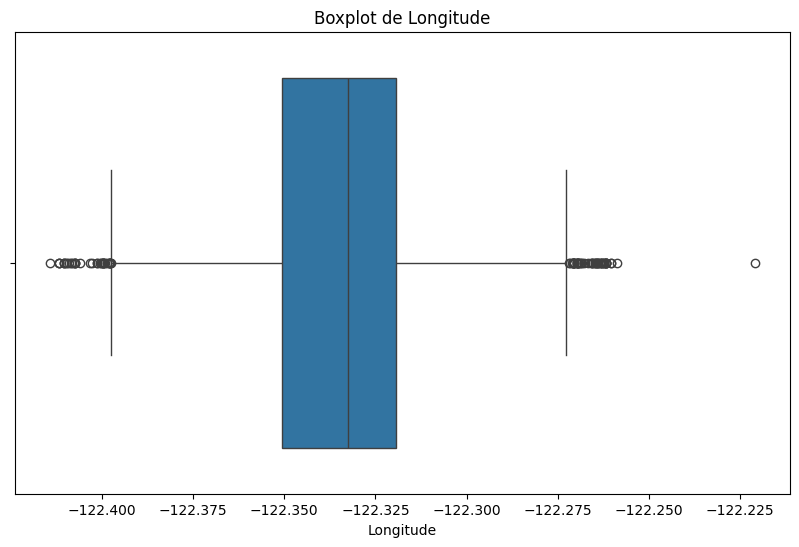

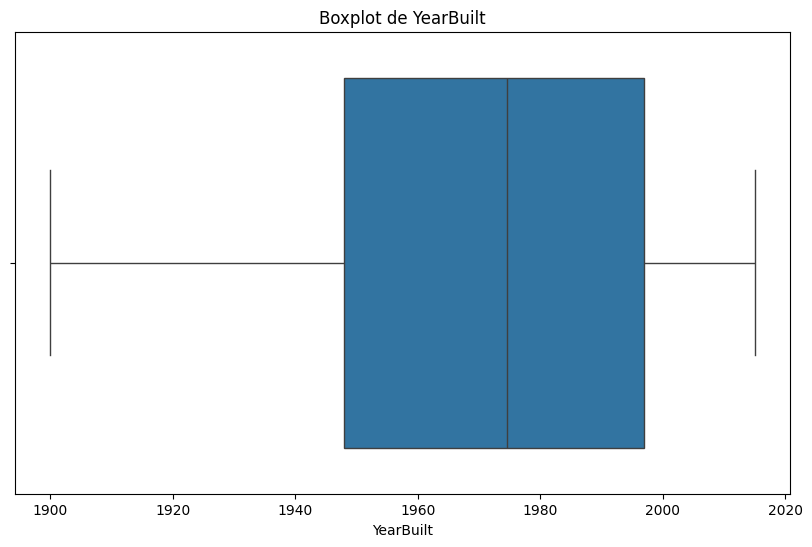

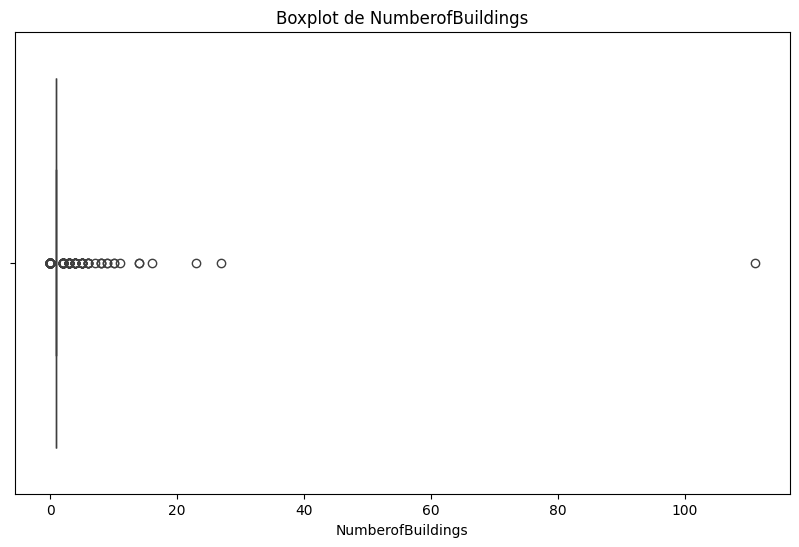

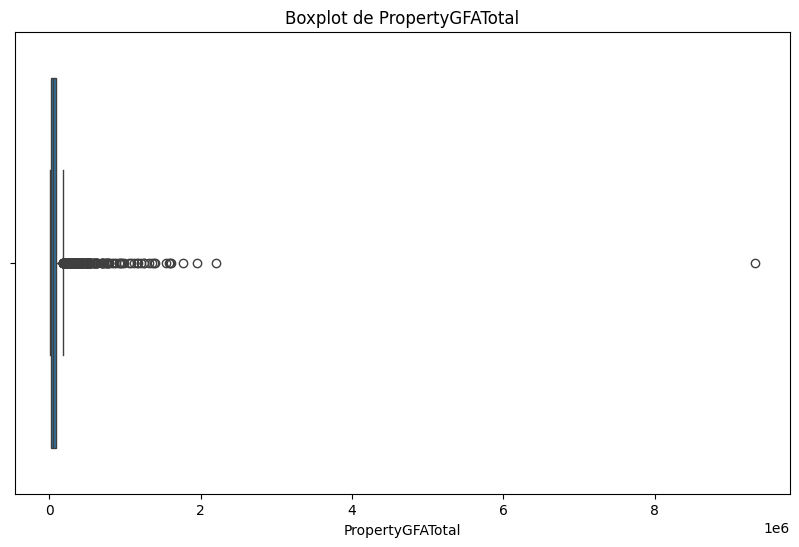

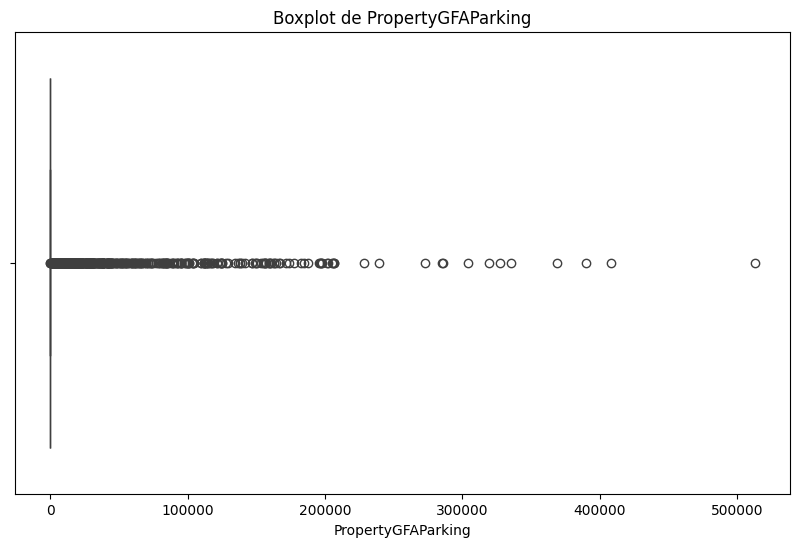

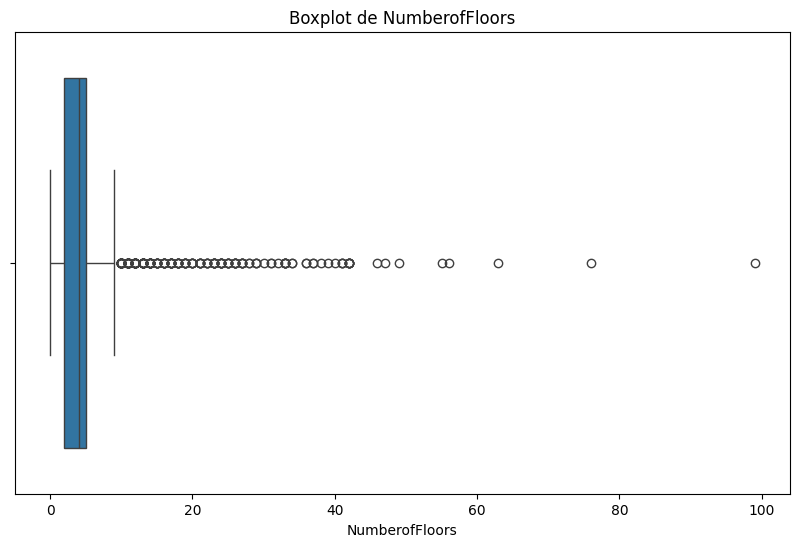

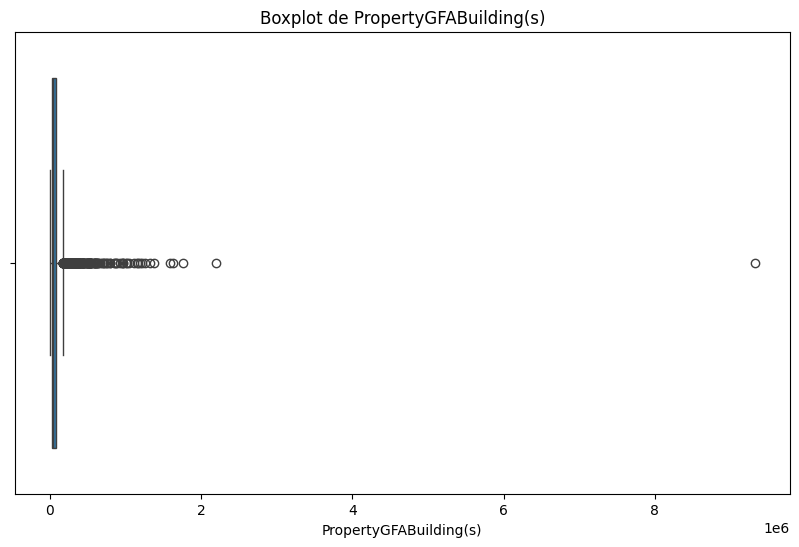

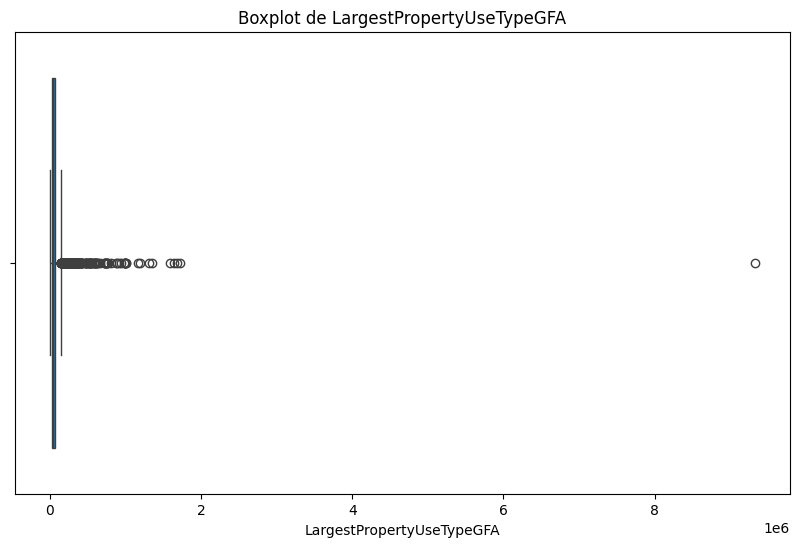

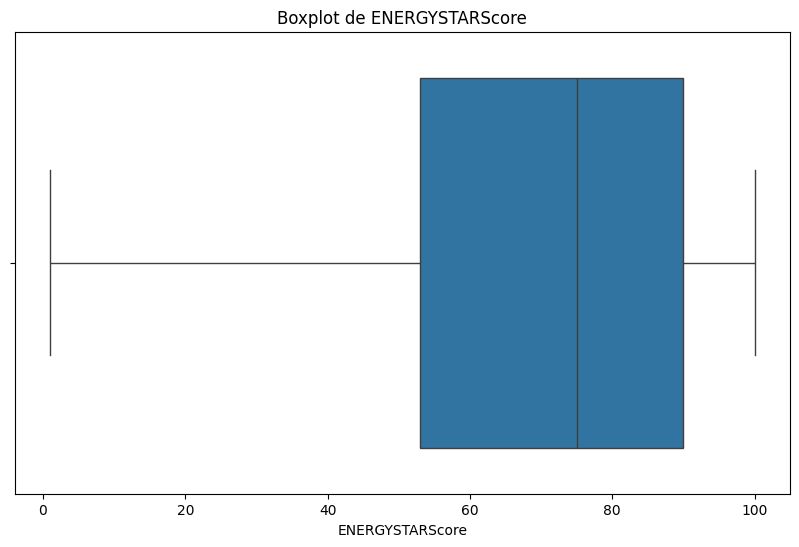

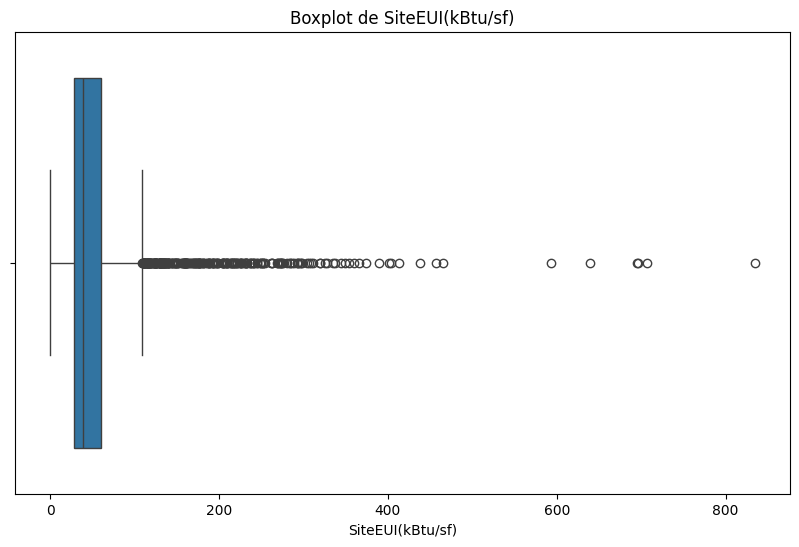

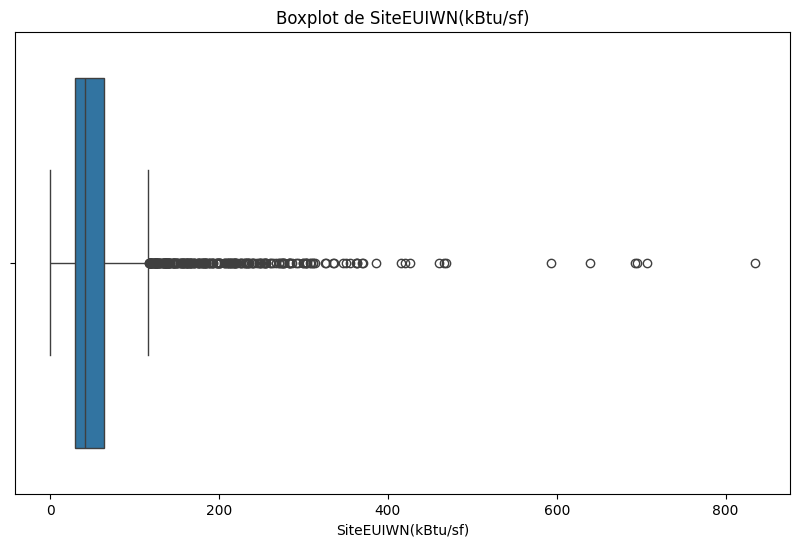

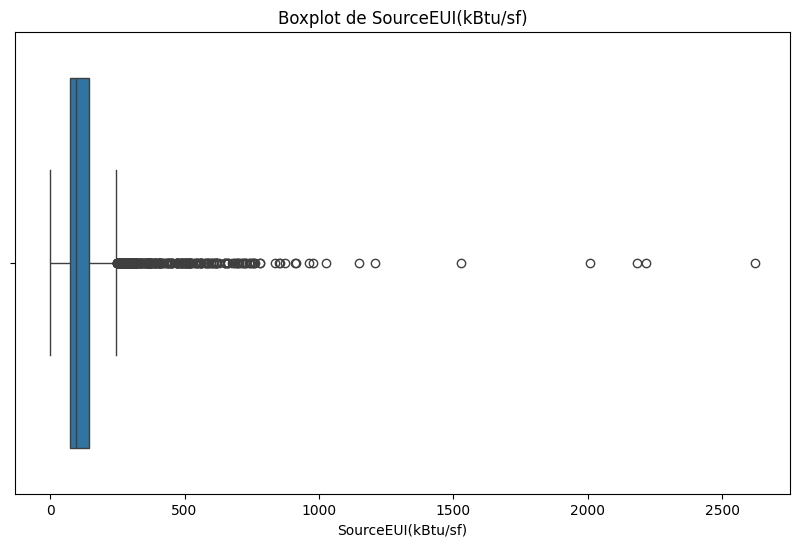

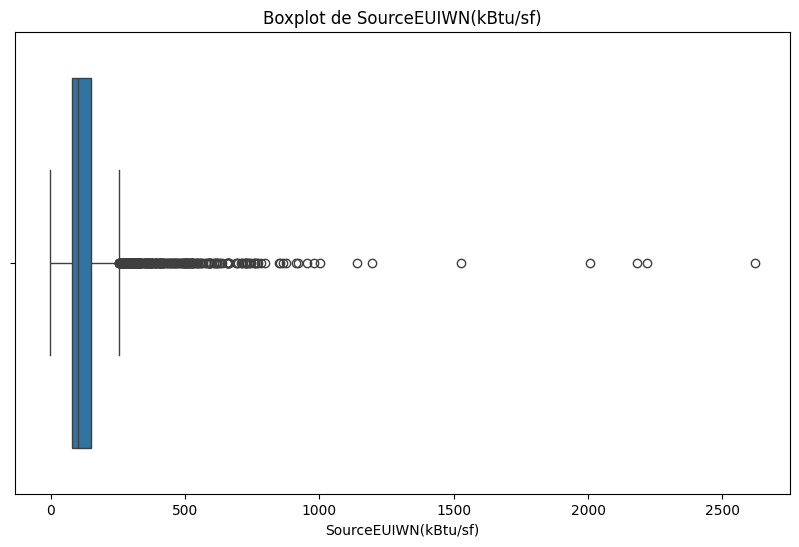

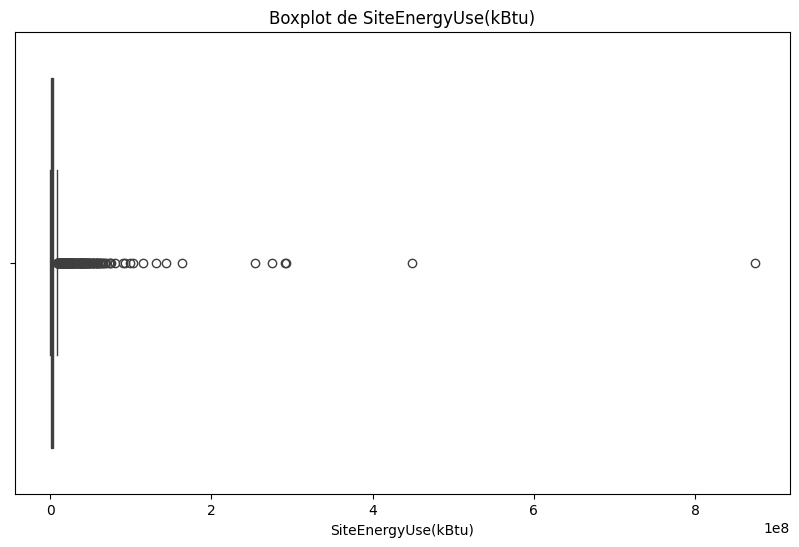

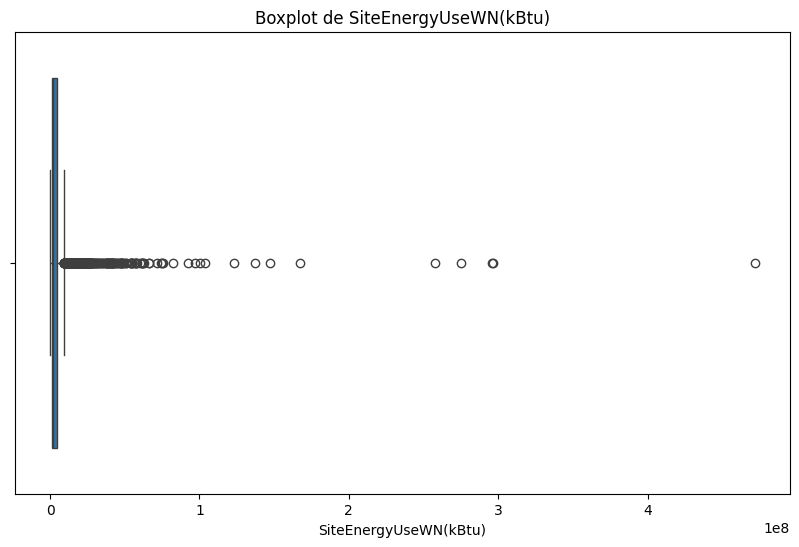

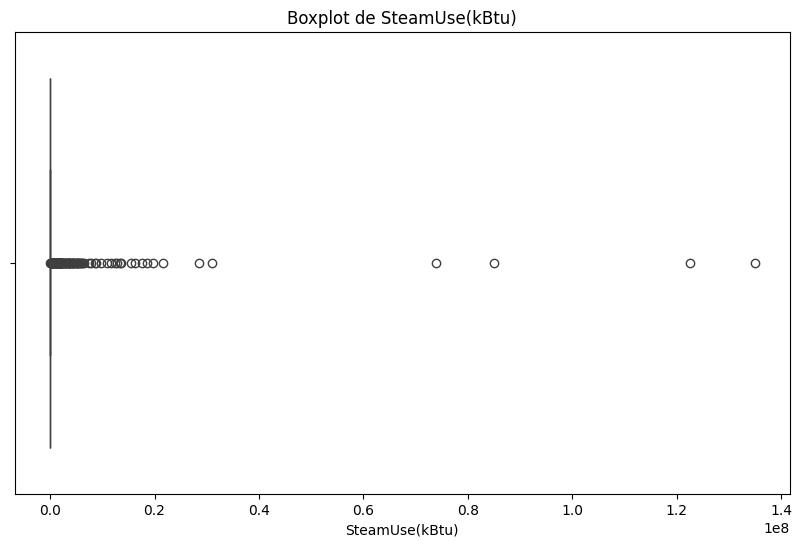

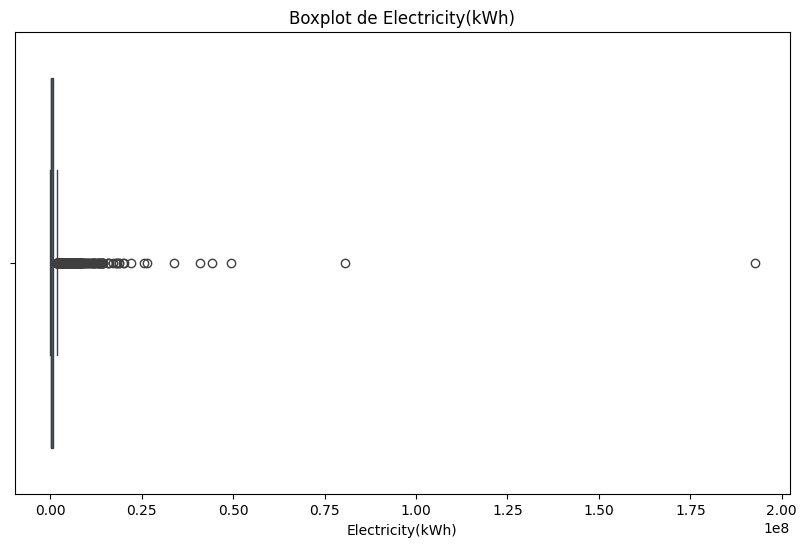

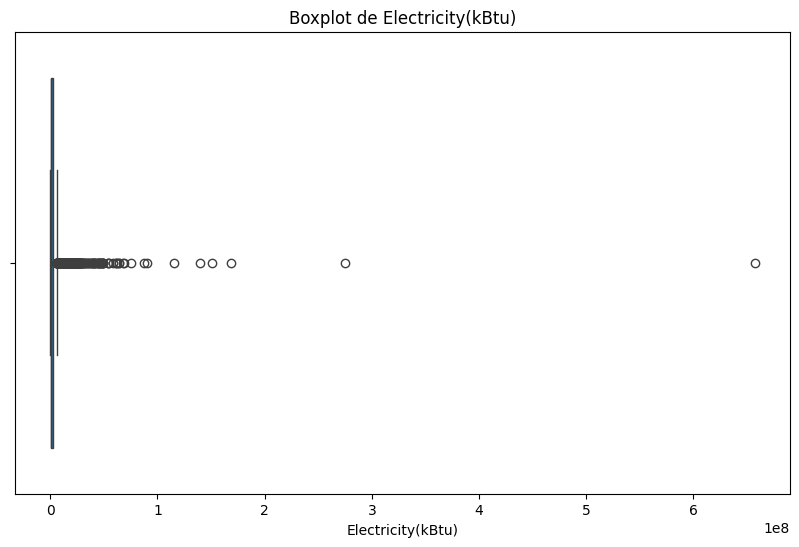

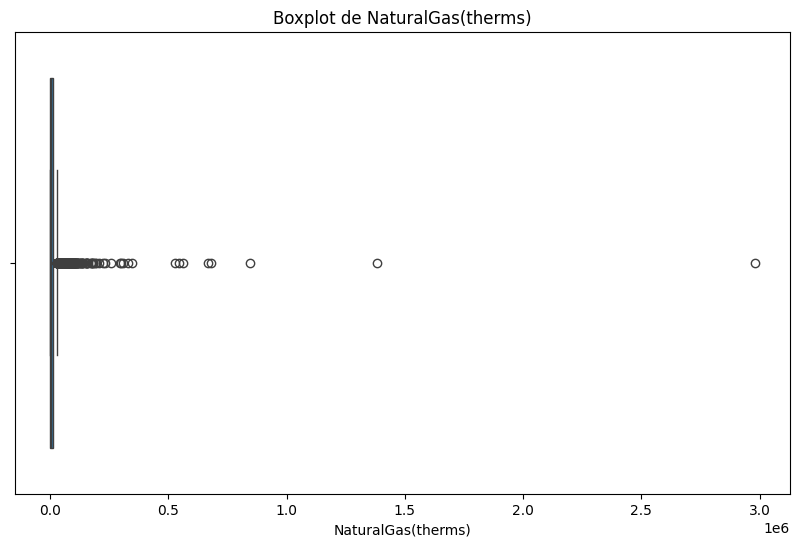

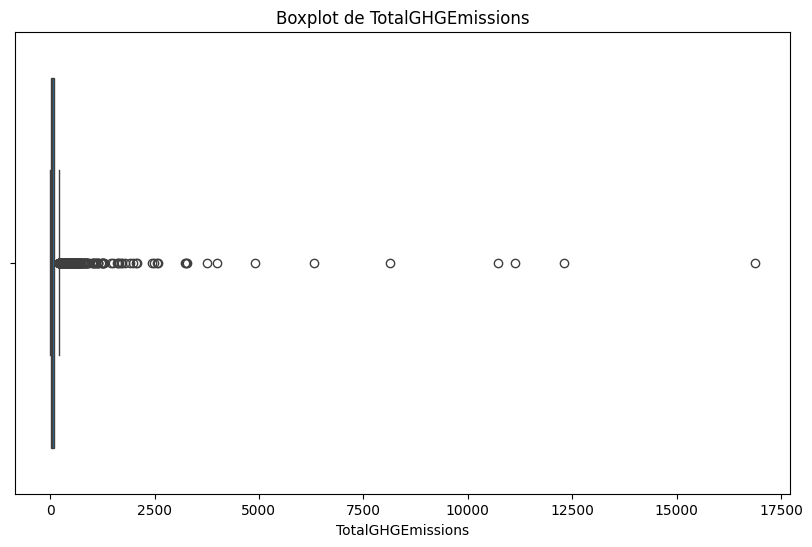

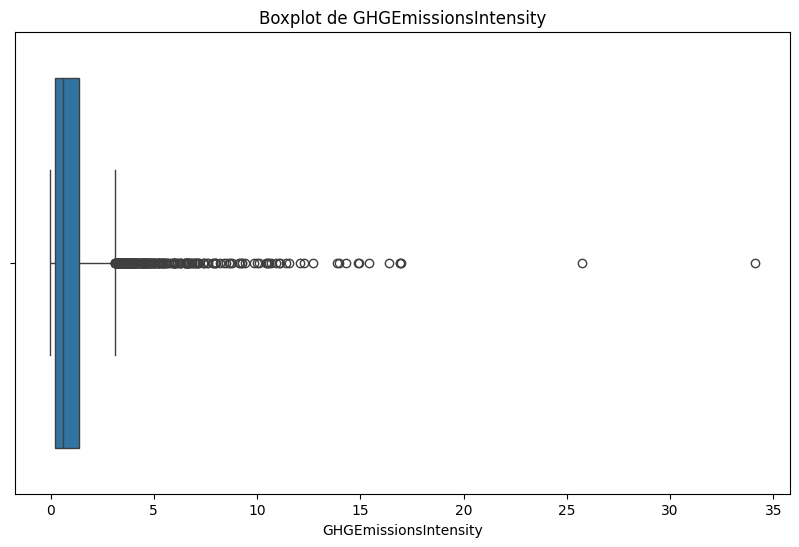

In [24]:
# Identifier les colonnes numériques
numerical_columns = data_pertinent.select_dtypes(include=['float64', 'int64']).columns

# Créer des boxplots pour chaque colonne numérique
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_pertinent[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()

In [25]:
data_pertinent["Outlier"].value_counts()

Outlier
Low outlier     23
High outlier     9
Name: count, dtype: int64

In [26]:
# Supprimer les lignes où 'Outlier' est égal à 'Low outlier' ou 'High outlier'
data_pertinent = data_pertinent[(data_pertinent['Outlier'] != 'Low outlier') & (data_pertinent['Outlier'] != 'High outlier')]

*identifier les outlier chaque colonne*

In [27]:
# Liste des colonnes numériques
numeric_cols = data_pertinent.select_dtypes(include=['float64', 'int64']).columns

# Dictionnaire pour stocker les outliers de chaque colonne
outliers_dict = {}

for col in numeric_cols:
    Q1 = data_pertinent[col].quantile(0.25)
    Q3 = data_pertinent[col].quantile(0.75)
    IQR = Q3 - Q1

    # Détection des outliers
    outliers = data_pertinent[
        (data_pertinent[col] < (Q1 - 1.5 * IQR)) |
        (data_pertinent[col] > (Q3 + 1.5 * IQR))
    ]

    # Stocker les outliers dans le dictionnaire
    outliers_dict[col] = outliers

# Exemple pour afficher les outliers d'une colonne spécifique
display(outliers_dict['SiteEnergyUse(kBtu)'])

BuildingType    PrimaryPropertyType  CouncilDistrictCode  \
2           NonResidential                  Hotel                    7   
4           NonResidential                  Hotel                    7   
5       Nonresidential COS                  Other                    7   
8           NonResidential                  Hotel                    7   
10          NonResidential                  Hotel                    7   
...                    ...                    ...                  ...   
3324        NonResidential           Large Office                    7   
3329    Nonresidential COS           Large Office                    7   
3333  Multifamily HR (10+)  High-Rise Multifamily                    7   
3354  Multifamily MR (5-9)         Residence Hall                    4   
3356        NonResidential     Mixed Use Property                    7   

                   Address  ZipCode Neighborhood  Latitude  Longitude  \
2          1900 5th Avenue  98101.0     DOWNTOWN  47.61393 -122.33810   
4            401 LENORA ST  98121.0     DOWNTOWN  47.61375 -122.34047   
5          810 Virginia St  98101.0     DOWNTOWN  47.61623 -122.33657   
8              612 2nd Ave  98104.0     DOWNTOWN  47.60294 -122.33263   
10         1101 4th Avenue  98101.0     DOWNTOWN  47.60695 -122.33414   
...                    ...      ...          ...       ...        ...   
3324  400 9th Avenue North  98109.0   LAKE UNION  47.62263 -122.33976   
3329    400 FAIRVIEW AVE N  98109.0   LAKE UNION  47.62251 -122.33390   
3333          2030 8th Ave  98121.0     DOWNTOWN  47.61652 -122.33735   
3354   1101 NE Campus Pkwy  98195.0    NORTHEAST  47.65577 -122.31702   
3356   601 Westlake Ave N.  98109.0   LAKE UNION  47.62497 -122.33883   

      YearBuilt  NumberofBuildings  PropertyGFATotal  PropertyGFAParking  \
2          1969                1.0            956110              196718   
4          1980                1.0            175580               62000   
5          1999                1.0             97288               37198   
8          1904                1.0            163984                   0   
10         1969                1.0            153163               19279   
...         ...                ...               ...                 ...   
3324       2015                1.0            483397              166208   
3329       2014                1.0            536697              197659   
3333       2015                1.0            319481               41915   
3354       2015                1.0            325000                   0   
3356       2015                1.0            345290               85028   

      NumberofFloors  PropertyGFABuilding(s)    LargestPropertyUseType  \
2                 41                  759392                     Hotel   
4                 18                  113580                     Hotel   
5                  2                   60090            Police Station   
8                 15                  163984                     Hotel   
10                11                  133884                     Hotel   
...              ...                     ...                       ...   
3324              12                  317189                    Office   
3329              13                  339038                    Office   
3333              40                  277566       Multifamily Housing   
3354               7                  325000  Residence Hall/Dormitory   
3356               6                  260262                Laboratory   

      LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
2                      756493.0             43.0         96.000000   
4                      123445.0             75.0        114.800003   
5                       88830.0              NaN        136.100006   
8                      163984.0             43.0         83.699997   
10                     133884.0             30.0        119.599998   
...                       

In [28]:
data_pertinent.describe()

CouncilDistrictCode       ZipCode     Latitude    Longitude  \
count          3336.000000   3320.000000  3336.000000  3336.000000   
mean              4.441547  98116.997289    47.624151  -122.334761   
std               2.118145     18.688233     0.047809     0.027191   
min               1.000000  98006.000000    47.499170  -122.414250   
25%               3.000000  98105.000000    47.600032  -122.350585   
50%               4.000000  98115.000000    47.618835  -122.332475   
75%               7.000000  98122.000000    47.657197  -122.319367   
max               7.000000  98272.000000    47.733870  -122.220966   

         YearBuilt  NumberofBuildings  PropertyGFATotal  PropertyGFAParking  \
count  3336.000000        3333.000000      3.336000e+03         3336.000000   
mean   1968.751199           1.106511      9.493071e+04         8043.758693   
std      33.021412           2.118290      2.188904e+05        32473.531739   
min    1900.000000           0.000000      1.128500e+04            0.000000   
25%    1948.750000           1.000000      2.852325e+04            0.000000   
50%    1975.000000           1.000000      4.429100e+04            0.000000   
75%    1997.000000           1.000000      9.115075e+04            0.000000   
max    2015.000000         111.000000      9.320156e+06       512608.000000   

       NumberofFloors  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count     3336.000000            3.336000e+03               3.321000e+03   
mean         4.716427            8.688695e+04               7.918814e+04   
std          5.512742            2.078654e+05               2.019668e+05   
min          0.000000            3.636000e+03               5.656000e+03   
25%          2.000000            2.779800e+04               2.514400e+04   
50%          4.000000            4.322800e+04               3.995200e+04   
75%          5.000000            8.445925e+04               7.662400e+04   
max         99.000000            9.320156e+06               9.320156e+06   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2509.000000       3336.000000         3336.000000   
mean         67.819450         54.721343           57.059143   
std          26.708489         55.918735           56.792424   
min           1.000000          0.000000            0.000000   
25%          53.000000         28.100000           29.500000   
50%          75.000000         38.700001           40.900002   
75%          90.000000         60.400002           64.224998   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3332.000000           3332.000000         3.336000e+03   
mean           134.267377            137.865666         5.418141e+06   
std            137.808040            137.554698         2.170619e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             75.000000             78.800003         9.355344e+05   
50%             96.400002            101.350002         1.809344e+06   
75%            143.899994            148.325001         4.218227e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.336000e+03    3.332000e+03      3.332000e+03   
mean            5.288876e+06    2.748679e+05      1.089282e+06   
std             1.599575e+07    3.929862e+06      4.368862e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%             9.851509e+05    0.000000e+00      1.888457e+05   
50%             1.915782e+06    0.000000e+00      3.467728e+05   
75%             4.380929e+06    0.000000e+00      8.308447e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  TotalGHGEmissions  \
count       3.332000e+03        3.332000e+03        3332.000000   
mean        3.716629e+06

### Suprimer les lignes qui ne sont pas remplis

In [29]:
# Calculer le taux de remplissage des colonnes
missing_values = data_pertinent.isnull().mean() * 100
print(missing_values)

BuildingType                   0.000000
PrimaryPropertyType            0.000000
CouncilDistrictCode            0.000000
Address                        0.000000
ZipCode                        0.479616
Neighborhood                   0.000000
Latitude                       0.000000
Longitude                      0.000000
YearBuilt                      0.000000
NumberofBuildings              0.089928
PropertyGFATotal               0.000000
PropertyGFAParking             0.000000
NumberofFloors                 0.000000
PropertyGFABuilding(s)         0.000000
LargestPropertyUseType         0.449640
LargestPropertyUseTypeGFA      0.449640
ENERGYSTARScore               24.790168
SiteEUI(kBtu/sf)               0.000000
DefaultData                    0.000000
SiteEUIWN(kBtu/sf)             0.000000
SourceEUI(kBtu/sf)             0.119904
SourceEUIWN(kBtu/sf)           0.119904
SiteEnergyUse(kBtu)            0.000000
SiteEnergyUseWN(kBtu)          0.000000
SteamUse(kBtu)                 0.119904


In [30]:
data_pertinent = data_pertinent.dropna(subset=['NumberofBuildings', 'TotalGHGEmissions', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA'])


In [31]:
# Calculer le taux de remplissage des colonnes
missing_values = data_pertinent.isnull().mean() * 100
print(missing_values)

BuildingType                   0.000000
PrimaryPropertyType            0.000000
CouncilDistrictCode            0.000000
Address                        0.000000
ZipCode                        0.481783
Neighborhood                   0.000000
Latitude                       0.000000
Longitude                      0.000000
YearBuilt                      0.000000
NumberofBuildings              0.000000
PropertyGFATotal               0.000000
PropertyGFAParking             0.000000
NumberofFloors                 0.000000
PropertyGFABuilding(s)         0.000000
LargestPropertyUseType         0.000000
LargestPropertyUseTypeGFA      0.000000
ENERGYSTARScore               24.661247
SiteEUI(kBtu/sf)               0.000000
DefaultData                    0.000000
SiteEUIWN(kBtu/sf)             0.000000
SourceEUI(kBtu/sf)             0.000000
SourceEUIWN(kBtu/sf)           0.000000
SiteEnergyUse(kBtu)            0.000000
SiteEnergyUseWN(kBtu)          0.000000
SteamUse(kBtu)                 0.000000


## La corrélation des variable

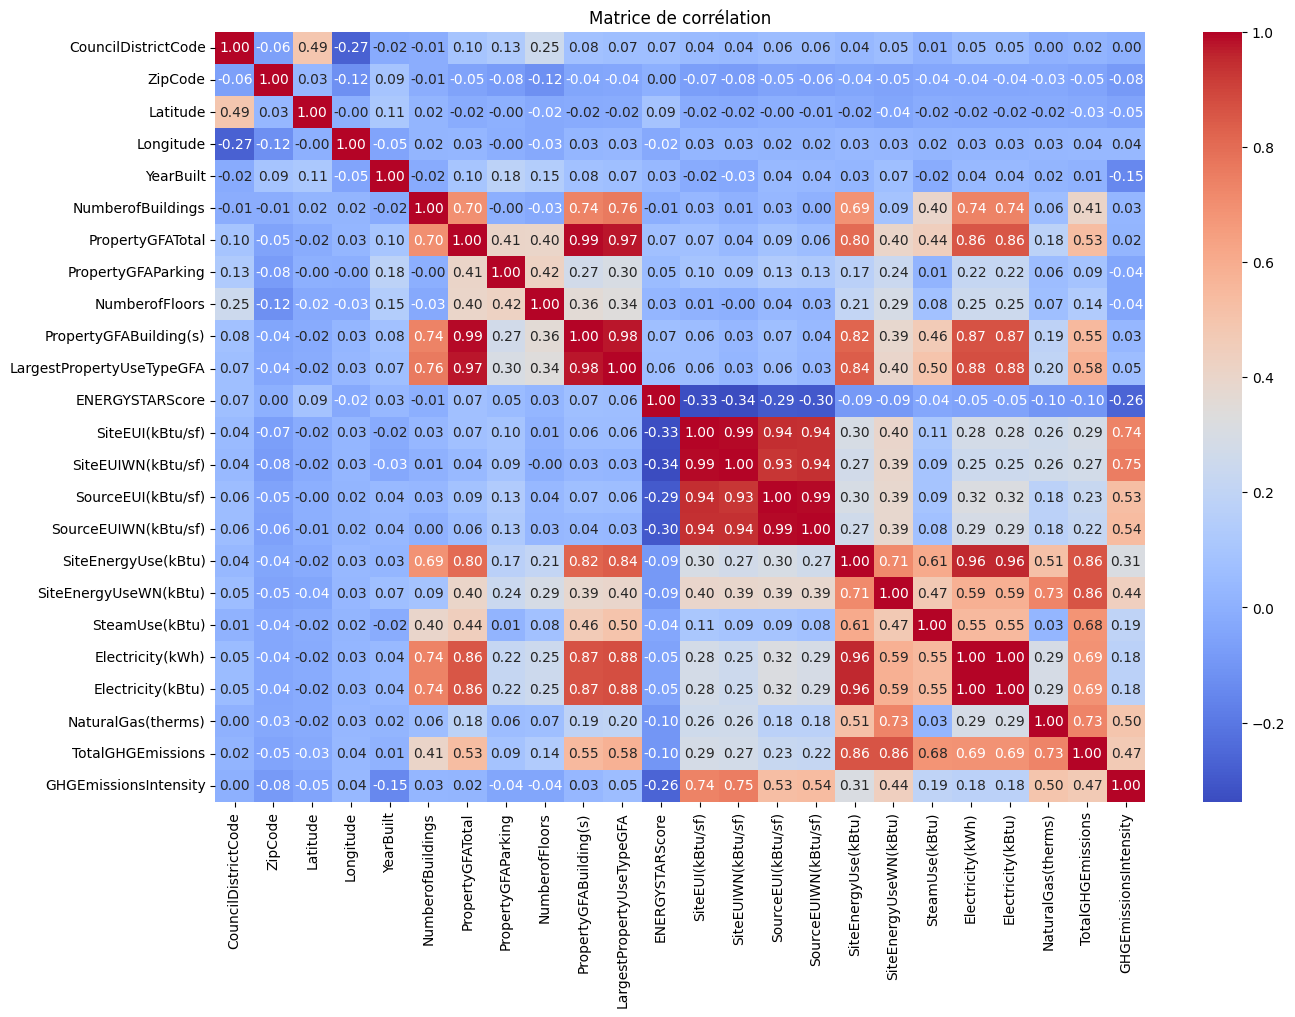

In [32]:
# Sélection des colonnes numériques
numerical_data = data_pertinent.select_dtypes(include=[np.number])

# Matrice de corrélation
corr_matrix = numerical_data.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

## Analyse des target

Text(0, 0.5, 'TotalGHGEmissions')

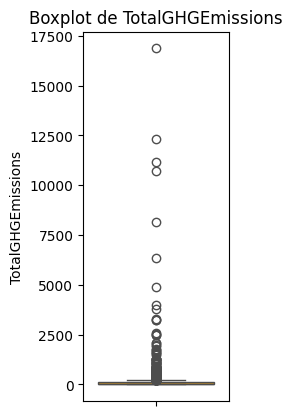

In [33]:
# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=data['TotalGHGEmissions'].dropna(), color='orange')
plt.title('Boxplot de TotalGHGEmissions')
plt.ylabel('TotalGHGEmissions')

Text(0, 0.5, 'TotalGHGEmissions')

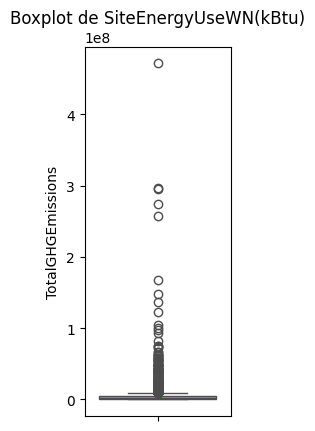

In [34]:
# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=data['SiteEnergyUseWN(kBtu)'].dropna(), color='orange')
plt.title('Boxplot de SiteEnergyUseWN(kBtu)')
plt.ylabel('TotalGHGEmissions')

Text(0, 0.5, 'TotalGHGEmissions')

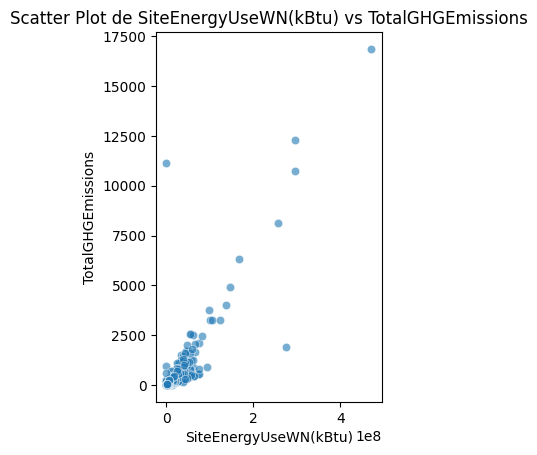

In [35]:
# Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['SiteEnergyUseWN(kBtu)'], y=data['TotalGHGEmissions'], alpha=0.6)
plt.title('Scatter Plot de SiteEnergyUseWN(kBtu) vs TotalGHGEmissions')
plt.xlabel('SiteEnergyUseWN(kBtu)')
plt.ylabel('TotalGHGEmissions')

In [37]:
import folium
import pandas as pd


# Filtrer les données pour avoir uniquement les lignes avec des valeurs valides de latitude et de longitude
df_geo = data[['Latitude', 'Longitude', 'TotalGHGEmissions']].dropna()

# Créer une carte centrée sur la moyenne des latitudes et longitudes
map_center = [df_geo['Latitude'].mean(), df_geo['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Ajouter des points sur la carte
for _, row in df_geo.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,
        weight=1,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'Total GHG Emissions: {row["TotalGHGEmissions"]}'
    ).add_to(mymap)

# Afficher la carte
mymap

*model avec que la variable quantitative*

In [38]:
# Les variables choisi
#vari_TotalGH = [
 #   'YearBuilt',
  #  "NumberofBuildings",
    #"PropertyGFATotal",
    #"NumberofFloors",
    #"PropertyGFABuilding(s)",
    #"TotalGHGEmissions",
#]

# Filtrer le DataFrame pour ne conserver que les variables pertinentes
#data_TotalGH = data_pertinent[vari_TotalGH]

# Afficher les premières lignes du DataFrame filtré pour vérifier
#display(data_TotalGH)

In [39]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score

# Assurez-vous que data_TotalGH est un DataFrame existant
#data_TotalGH = data_TotalGH.rename(columns={"TotalGHGEmissions": "target"})

#data_TotalGH = data_TotalGH.dropna(axis=0)
#data_TotalGH.head()

In [40]:
# Renommer la colonne cible
#data_TotalGH = data_TotalGH.rename(columns={"TotalGHGEmissions": "target"})

In [41]:
#x = data_TotalGH.drop(columns="target")
#y = data_TotalGH.target

In [42]:
# Diviser les données en ensembles d'entraînement et de test
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import ElasticNet

In [44]:
#parameters = {'alpha':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10], 'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

In [45]:
#regressor = ElasticNet()
#grid = GridSearchCV(regressor, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True)
#grid.fit(x_train, y_train)

In [46]:
## maintenant afficher les resultats

#resultat_elastic = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
#resultat_elastic

In [47]:
### **Pipeline**
#*On a besoin de centrer et reduit, dans ce cas on a besoin d'un tuyau ou on va passer les choses*

#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline

#pipeline = Pipeline(
 #   [
   #     ("preprocessor", StandardScaler()),
    #    ("regressor", ElasticNet()),
  #  ]
#)

#parameters = {'regressor__alpha':[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15], 'regressor__l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}


#grid = GridSearchCV(pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True)
#grid.fit(x_train, y_train)

## maintenant afficher les resultats

#resultat_pipeline_elastic = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
#resultat_pipeline_elastic